In [2]:
import pandas as pd
import numpy as np

In [5]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


['new sn',
 'sn',
 'new',
 'np',
 'coating',
 'bacteria',
 'mdr',
 'strain',
 'np_synthesis',
 'method',
 'MIC_NP (µg/mL)',
 'concentration for ZOI (µg/ml)',
 'zoi_np (mm)',
 'np_size_min (nm)',
 'np_size_max (nm)',
 'np_size_avg (nm)',
 'shape',
 'time_set (hours)',
 'zeta_potential (mV)',
 'Solvent for extract',
 'Temperature for extract, C',
 'Duration preparing extract, min',
 'Precursor of NP',
 'Concentration of precursor (mM)',
 'hydrodynamic diameter',
 'pH during synthesis',
 'reference',
 'doi',
 'article_list',
 'journal_name',
 'publisher',
 'year',
 'title',
 'journal_is_oa',
 'is_oa',
 'oa_status',
 'verification required',
 'verified_by',
 'verification_date',
 'has_mistake_in_data',
 'has_mistake_in_matadata',
 'entry_status',
 'comment',
 'accept/reject',
 'Unnamed: 44',
 'IdList',
 'Bacteria',
 'Strain',
 'Superkingdom',
 'Kingdom',
 'Clade',
 'Phylum',
 'Class',
 'Order',
 'Family',
 'Genus',
 'Species',
 'bac_type',
 'gram',
 'min_Incub_period, h',
 'avg_Incub_perio

In [6]:
data = pd.read_excel('validated_data_merged_tax (4).xlsx', index_col = 0)

cols = ['new sn', 'sn', 'new','article_list', 'journal_name', 'publisher', 'year', 'title',
       'journal_is_oa', 'is_oa', 'oa_status', 'verification required',
       'verified_by', 'verification_date', 'has_mistake_in_data',
       'has_mistake_in_matadata', 'entry_status', 'comment', 'accept/reject',
       'Unnamed: 44', 'IdList', 
        'zeta_potential (mV)', 
        'pH during synthesis', 
        'Concentration of precursor (mM)', 'hydrodynamic diameter', 'Precursor of NP', 
        'Clade', 'Class', 'Family']
# data = data.drop(cols, axis=1)

#.sort_index().head(60)


In [3]:
def fill_na_mode(df, col_name=str):
  df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
  return df

def fill_na_mean(df, col_name=str):
  df[col_name] = df[col_name].fillna(df[col_name].mean())
  return df

df = data.copy()
df['np_size_avg (nm)'] = df['np_size_avg (nm)'].astype('float64')
#df['np_size_avg (nm)'] = df['np_size_avg (nm)'].to_numeric()
fill_mode = ['time_set (hours)', 'Solvent for extract', 'shape']
fill_mean = [ 'Duration preparing extract, min', 'Temperature for extract, C']




df.isna().sum()

np                                    0
coating                               0
bacteria                              0
mdr                                   0
strain                             1498
np_synthesis                          0
method                                0
MIC_NP (µg/mL)                     1171
concentration for ZOI (µg/ml)      2141
zoi_np (mm)                        2098
np_size_min (nm)                    162
np_size_max (nm)                    162
np_size_avg (nm)                     36
shape                               402
time_set (hours)                    417
Solvent for extract                1558
Temperature for extract, C         1482
Duration preparing extract, min    1761
reference                             0
doi                                   0
Bacteria                              0
Strain                             2301
Superkingdom                          0
Kingdom                               0
Phylum                                0


In [113]:
for col_name in fill_mode:
  fill_na_mode(df, col_name)

for col_name in fill_mean:
  fill_na_mean(df, col_name)

df

np  coating               bacteria  mdr     strain  \
0     Ag        0      Bacillus subtilis    0   MTCC 441   
1     Ag        0      Bacillus subtilis    0   MTCC 441   
2     Ag        0       Escherichia coli    0   MTCC 443   
3     Ag        0       Escherichia coli    0   MTCC 739   
4     Ag        0       Escherichia coli    0  MTCC 1302   
...   ..      ...                    ...  ...        ...   
3264  Ag        0       Escherichia coli    0        NaN   
3265  Ag        0  Staphylococcus aureus    0        NaN   
3266  Ag        0       Escherichia coli    0        NaN   
3267  Ag        0  Staphylococcus aureus    0        NaN   
3268  Ag        0       Escherichia coli    0        NaN   

                                           np_synthesis method  \
0     chemical_synthesis using sodium borohydride an...    MIC   
1     chemical_synthesis using sodium borohydride an...    MBC   
2     chemical_synthesis using sodium borohydride an...    MIC   
3     chemical_synthesis using sodium borohydride an...    MIC   
4     chemical_synthesis using sodium borohydride an...    MIC   
...                                                 ...    ...   
3264          Green synthesis using Melissa officinalis    ZOI   
3265          Green synthesis using Melissa officinalis    ZOI   
3266          Green synthesis using Melissa officinalis    ZOI   
3267          Green synthesis using Melissa officinalis    ZOI   
3268          Green synthesis using Melissa officinalis    ZOI   

      MIC_NP (µg/mL)  concentration for ZOI (µg/ml)  zoi_np (mm)  ...  \
0               40.0                            NaN          NaN  ...   
1               60.0                            NaN          NaN  ...   
2               40.0                            NaN          NaN  ...   
3              180.0                            NaN          NaN  ...   
4              120.0                            NaN          NaN  ...   
...              ...                            ...          ...  ...   
3264             NaN                            9.0          6.0  ...   
3265             NaN                           15.0         11.0  ...   
3266             NaN                           15.0         12.0  ...   
3267             NaN                           20.0         11.5  ...   
3268             NaN                           20.0         12.5  ...   

                    bac_type  gram  min_Incub_period, h avg_Incub_period, h  \
0             non-pathogenic     p                  6.0                  12   
1             non-pathogenic     p                  6.0                  12   
2                 pathogenic     n                  6.0                  12   
3                 pathogenic     n                  6.0                  12   
4     opportunistic pathogen     n                  1.5                   4   
...                      ...   ...                  ...                 ...   
3264  opportunistic pathogen     n                  1.5                   4   
3265              pathogenic     p                  4.0                   8   
3266  opportunistic pathogen     n                  1.5                   4   
3267              pathogenic     p                  4.0                   8   
3268  opportunistic pathogen     n                  1.5                   4   

      max_Incub_period, h growth_temp, C   biosafety_level  \
0                      18            33.5                1   
1                      18            33.5                1   
2                      18            37.0                1   
3                      24            37.0                1   
4                      24            37.0                1   
...                   ...             ...              ...   
3264                   24            37.0                1   
3265                   24            37.0                2   
3266                   24            37.0                1   
3267                   24            37.0     

In [4]:
def fill_size_missing_values(df, avg_col='np_size_avg (nm)', max_col='np_size_max (nm)', min_col='np_size_min (nm)'):
    """
    Заполняет пропуски в размерах:
    - Для пропущенного среднего: среднее от максимального и минимального
    - Для пропущенных максимального/минимального: значение из среднего
    """
    result_df = df.copy()
    
    # Заполняем средний размер
    avg_mask = result_df[avg_col].isna()
    result_df.loc[avg_mask, avg_col] = (
        result_df.loc[avg_mask, max_col] + 
        result_df.loc[avg_mask, min_col]
    ) / 2
    
    # Заполняем максимальный размер
    max_mask = result_df[max_col].isna()
    result_df.loc[max_mask, max_col] = result_df.loc[max_mask, avg_col]
    
    # Заполняем минимальный размер
    min_mask = result_df[min_col].isna()
    result_df.loc[min_mask, min_col] = result_df.loc[min_mask, avg_col]
    
    return result_df

In [115]:
filled_df = fill_size_missing_values(df)
# filled_df = fill_precursor_missing_efficient(filled_df)

In [116]:
filled_df.isna().sum()

np                                    0
coating                               0
bacteria                              0
mdr                                   0
strain                             1498
np_synthesis                          0
method                                0
MIC_NP (µg/mL)                     1171
concentration for ZOI (µg/ml)      2141
zoi_np (mm)                        2098
np_size_min (nm)                      0
np_size_max (nm)                      0
np_size_avg (nm)                      0
shape                                 0
time_set (hours)                      0
Solvent for extract                   0
Temperature for extract, C            0
Duration preparing extract, min       0
reference                             0
doi                                   0
Bacteria                              0
Strain                             2301
Superkingdom                          0
Kingdom                               0
Phylum                                0


In [117]:
filled_df.method.unique()

array(['MIC', 'MBC', 'ZOI', 'MBEC', 'MBIC', 'MIc', 'MFC', 'MMC'],
      dtype=object)

In [118]:
MIC_method = ['MIC', 'MBC', 'MBEC', 'MBIC', 'MIc', 'MFC', 'MMC']

In [136]:
MIC_df = filled_df[filled_df['method'].isin(MIC_method)]
MIC_df = MIC_df.drop(['concentration for ZOI (µg/ml)', 'zoi_np (mm)'], axis = 1)

ZOI_df = filled_df[filled_df['method'] == 'ZOI']
ZOI_df = ZOI_df.drop('MIC_NP (µg/mL)', axis = 1)
ZOI_df = ZOI_df.dropna(subset=['concentration for ZOI (µg/ml)'])

In [107]:
MIC_df.isna().sum()

np                                    0
coating                               0
bacteria                              0
mdr                                   0
strain                              767
np_synthesis                          0
method                                0
MIC_NP (µg/mL)                        0
np_size_min (nm)                      0
np_size_max (nm)                      0
np_size_avg (nm)                      0
shape                                 0
time_set (hours)                      0
Solvent for extract                   0
Temperature for extract, C            0
Duration preparing extract, min       0
reference                             0
doi                                   0
Bacteria                              0
Strain                             1290
Superkingdom                          0
Kingdom                               0
Phylum                                0
Order                                 0
Genus                                 0


In [137]:
ZOI_df.isna().sum()

np                                   0
coating                              0
bacteria                             0
mdr                                  0
strain                             728
np_synthesis                         0
method                               0
concentration for ZOI (µg/ml)        0
zoi_np (mm)                          0
np_size_min (nm)                     0
np_size_max (nm)                     0
np_size_avg (nm)                     0
shape                                0
time_set (hours)                     0
Solvent for extract                  0
Temperature for extract, C           0
Duration preparing extract, min      0
reference                            0
doi                                  0
Bacteria                             0
Strain                             984
Superkingdom                         0
Kingdom                              0
Phylum                               0
Order                                0
Genus                    

In [123]:
43/1171

0.036720751494449186

In [138]:
ZOI_df

np  coating               bacteria  mdr     strain  \
68    Ag        0       Escherichia coli    0   MTCC 443   
69    Cu        0       Escherichia coli    0   MTCC 443   
70    Ag        0       Escherichia coli    0   MTCC 739   
71    Cu        0       Escherichia coli    0   MTCC 739   
72    Ag        0       Escherichia coli    0  MTCC 1302   
...   ..      ...                    ...  ...        ...   
3264  Ag        0       Escherichia coli    0        NaN   
3265  Ag        0  Staphylococcus aureus    0        NaN   
3266  Ag        0       Escherichia coli    0        NaN   
3267  Ag        0  Staphylococcus aureus    0        NaN   
3268  Ag        0       Escherichia coli    0        NaN   

                                           np_synthesis method  \
68    chemical_synthesis using sodium borohydride an...    ZOI   
69    chemical_synthesis using sodium borohydride an...    ZOI   
70    chemical_synthesis using sodium borohydride an...    ZOI   
71    chemical_synthesis using sodium borohydride an...    ZOI   
72    chemical_synthesis using sodium borohydride an...    ZOI   
...                                                 ...    ...   
3264          Green synthesis using Melissa officinalis    ZOI   
3265          Green synthesis using Melissa officinalis    ZOI   
3266          Green synthesis using Melissa officinalis    ZOI   
3267          Green synthesis using Melissa officinalis    ZOI   
3268          Green synthesis using Melissa officinalis    ZOI   

      concentration for ZOI (µg/ml)  zoi_np (mm)  np_size_min (nm)  ...  \
68                            100.0         14.0              2.26  ...   
69                            100.0          9.0              6.86  ...   
70                            100.0         13.0              2.26  ...   
71                            100.0          9.0              6.86  ...   
72                            100.0         15.0              2.26  ...   
...                             ...          ...               ...  ...   
3264                            9.0          6.0             12.00  ...   
3265                           15.0         11.0             12.00  ...   
3266                           15.0         12.0             12.00  ...   
3267                           20.0         11.5             12.00  ...   
3268                           20.0         12.5             12.00  ...   

                    bac_type  gram min_Incub_period, h  avg_Incub_period, h  \
68                pathogenic     n                 6.0                   12   
69                pathogenic     n                 6.0                   12   
70                pathogenic     n                 6.0                   12   
71                pathogenic     n                 6.0                   12   
72    opportunistic pathogen     n                 1.5                    4   
...                      ...   ...                 ...                  ...   
3264  opportunistic pathogen     n                 1.5                    4   
3265              pathogenic     p                 4.0                    8   
3266  opportunistic pathogen     n                 1.5                    4   
3267              pathogenic     p                 4.0                    8   
3268  opportunistic pathogen     n                 1.5                    4   

     max_Incub_period, h  growth_temp, C   biosafety_level common_environment  \
68                    18             37.0                1              human   
69                    18             37.0                1              human   
70                    24             37.0                1              human   
71                    24             37.0                1              human   
72                    24             37.0                1              human   
...                  ...              ...              ...                ...   
3264                  24             37.0                1              hum

In [121]:
ZOI_df[ZOI_df['concentration for ZOI (µg/ml)'].isna()]

np  coating                                           bacteria  mdr  \
229   Ag        1                                    Bacillus cereus    0   
230   Ag        1                                   Escherichia coli    0   
231   Ag        1                              Klebsiella pneumoniae    0   
232   Ag        1                             Pseudomonas aeruginosa    0   
233   Ag        1                              Staphylococcus aureus    0   
234   Ag        1                         Staphylococcus epidermidis    0   
235   Ag        1  Salmonella enterica subsp. enterica serovar Ty...    0   
236   Ag        1                                  Vibrio vulnificus    0   
237   Ag        0                                    Bacillus cereus    0   
238   Ag        0                                   Escherichia coli    0   
239   Ag        0                              Klebsiella pneumoniae    0   
240   Ag        0                             Pseudomonas aeruginosa    0   
241   Ag        0                              Staphylococcus aureus    0   
242   Ag        0                         Staphylococcus epidermidis    0   
243   Ag        0                                  Vibrio vulnificus    0   
244   Ag        0  Salmonella enterica subsp. enterica serovar Ty...    0   
679   Ag        0                              Staphylococcus aureus    0   
680   Ag        0                              Staphylococcus aureus    0   
681   Ag        0                              Staphylococcus aureus    0   
682   Ag        0                              Staphylococcus aureus    0   
683   Ag        0                              Staphylococcus aureus    0   
684   Ag        0                              Staphylococcus aureus    0   
685   Ag        0                             Pseudomonas aeruginosa    0   
686   Ag        0                             Pseudomonas aeruginosa    0   
687   Ag        0                             Pseudomonas aeruginosa    0   
688   Ag        0                             Pseudomonas aeruginosa    0   
689   Ag        0                             Pseudomonas aeruginosa    0   
690   Ag        0                             Pseudomonas aeruginosa    0   
691   Ag        0                                   Escherichia coli    0   
692   Ag        0                                   Escherichia coli    0   
693   Ag        0                                   Escherichia coli    0   
694   Ag        0                                   Escherichia coli    0   
695   Ag        0                                   Escherichia coli    0   
696   Ag        0                                   Escherichia coli    0   
2614  Ag        0                            Acinetobacter baumannii    0   
2615  Ag        0                                   Escherichia coli    0   
2616  Ag        0                             Streptococcus pyogenes    0   
2617  Ag        0                            Acinetobacter baumannii    0   
2618  Ag        0                                   Escherichia coli    0   
2619  Ag        0                             Streptococcus pyogenes    0   
3244  Ag        0                                   Escherichia coli    0   
3245  Ag        0  Salmonella enterica subsp. enterica serovar Ty...    0   
3246  Ag        0                              Staphylococcus aureus    0   

          strain                                       np_synthesis method  \
229     MTCC 619  chemical_synthesis purchased from sigma aldric...    ZOI   
230    MTCC 4296  chemical_synthesis purchased from sigma aldric...    ZOI   
231    MTCC 4030  chemical_synthesis purchased from sigma aldric...    ZOI   
232     MTCC 424  chemical_synthesis purchased from sigma aldric...    ZOI   
233    MTCC 3160  chemical_synthesis purchased from sigma aldric...    ZOI   
234     MTCC 435  chemical_synthesis purchased from sigma aldric...    ZOI   
235    MTCC 3216  chemical_synthesis purchased from sigma aldric...    

In [140]:
MIC_df.to_csv('MIC_df.csv')
ZOI_df.to_csv('ZOI_df.csv')

In [153]:
MIC_df.isna().sum()

np                                    0
coating                               0
bacteria                              0
mdr                                   0
strain                              767
np_synthesis                          0
method                                0
MIC_NP (µg/mL)                        0
np_size_min (nm)                      0
np_size_max (nm)                      0
np_size_avg (nm)                      0
shape                                 0
time_set (hours)                      0
Solvent for extract                   0
Temperature for extract, C            0
Duration preparing extract, min       0
reference                             0
doi                                   0
Bacteria                              0
Strain                             1290
Superkingdom                          0
Kingdom                               0
Phylum                                0
Order                                 0
Genus                                 0


In [142]:
ZOI_df

np  coating               bacteria  mdr     strain  \
68    Ag        0       Escherichia coli    0   MTCC 443   
69    Cu        0       Escherichia coli    0   MTCC 443   
70    Ag        0       Escherichia coli    0   MTCC 739   
71    Cu        0       Escherichia coli    0   MTCC 739   
72    Ag        0       Escherichia coli    0  MTCC 1302   
...   ..      ...                    ...  ...        ...   
3264  Ag        0       Escherichia coli    0        NaN   
3265  Ag        0  Staphylococcus aureus    0        NaN   
3266  Ag        0       Escherichia coli    0        NaN   
3267  Ag        0  Staphylococcus aureus    0        NaN   
3268  Ag        0       Escherichia coli    0        NaN   

                                           np_synthesis method  \
68    chemical_synthesis using sodium borohydride an...    ZOI   
69    chemical_synthesis using sodium borohydride an...    ZOI   
70    chemical_synthesis using sodium borohydride an...    ZOI   
71    chemical_synthesis using sodium borohydride an...    ZOI   
72    chemical_synthesis using sodium borohydride an...    ZOI   
...                                                 ...    ...   
3264          Green synthesis using Melissa officinalis    ZOI   
3265          Green synthesis using Melissa officinalis    ZOI   
3266          Green synthesis using Melissa officinalis    ZOI   
3267          Green synthesis using Melissa officinalis    ZOI   
3268          Green synthesis using Melissa officinalis    ZOI   

      concentration for ZOI (µg/ml)  zoi_np (mm)  np_size_min (nm)  ...  \
68                            100.0         14.0              2.26  ...   
69                            100.0          9.0              6.86  ...   
70                            100.0         13.0              2.26  ...   
71                            100.0          9.0              6.86  ...   
72                            100.0         15.0              2.26  ...   
...                             ...          ...               ...  ...   
3264                            9.0          6.0             12.00  ...   
3265                           15.0         11.0             12.00  ...   
3266                           15.0         12.0             12.00  ...   
3267                           20.0         11.5             12.00  ...   
3268                           20.0         12.5             12.00  ...   

                    bac_type  gram min_Incub_period, h  avg_Incub_period, h  \
68                pathogenic     n                 6.0                   12   
69                pathogenic     n                 6.0                   12   
70                pathogenic     n                 6.0                   12   
71                pathogenic     n                 6.0                   12   
72    opportunistic pathogen     n                 1.5                    4   
...                      ...   ...                 ...                  ...   
3264  opportunistic pathogen     n                 1.5                    4   
3265              pathogenic     p                 4.0                    8   
3266  opportunistic pathogen     n                 1.5                    4   
3267              pathogenic     p                 4.0                    8   
3268  opportunistic pathogen     n                 1.5                    4   

     max_Incub_period, h  growth_temp, C   biosafety_level common_environment  \
68                    18             37.0                1              human   
69                    18             37.0                1              human   
70                    24             37.0                1              human   
71                    24             37.0                1              human   
72                    24             37.0                1              human   
...                  ...              ...              ...                ...   
3264                  24             37.0                1              hum

In [152]:
df['Solvent for extract'].value_counts()

Solvent for extract
water                            2309
water (distilled)                 429
ethanol                           125
water (Milli-Q)                    88
water (double distilled)           78
water (deionized)                  62
aceton                             44
methanol                           43
water (sterile deionized)          40
in deionized distilled water,      16
sterile distilled water            11
DPPH                                6
water (triple distilled)            4
sterile deionized water             4
triple-deionized water              4
Milli-Q water                       2
water (demineralized )              2
sodium dodecyl sulfate              2
Name: count, dtype: int64

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detect_outliers_iqr(df, numerical_columns=None):
    """
    Detect outliers using IQR method for numerical columns
    """
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    outlier_report = {}
    
    for col in numerical_columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(df)) * 100
            
            outlier_report[col] = {
                'outlier_count': outlier_count,
                'outlier_percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outliers': outliers[col].tolist()
            }
    
    return outlier_report

def detect_outliers_zscore(df, numerical_columns=None, threshold=3):
    """
    Detect outliers using Z-score method
    """
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    outlier_report = {}
    
    for col in numerical_columns:
        if col in df.columns:
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            outliers = df[z_scores > threshold]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(df)) * 100
            
            outlier_report[col] = {
                'outlier_count': outlier_count,
                'outlier_percentage': outlier_percentage,
                'threshold': threshold,
                'outliers': outliers[col].tolist()
            }
    
    return outlier_report

def visualize_outliers(df, numerical_columns=None):
    """
    Create visualizations for outlier detection
    """
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    n_cols = min(3, len(numerical_columns))
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(15, 5 * n_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_columns):
        if i * 2 < len(axes):
            # Box plot
            # axes[i*2].violinplot(df[col].dropna())
            axes[i*2].boxplot(df[col].dropna())
            axes[i*2].set_title(f'Box Plot - {col}')
            
            # Histogram
            axes[i*2+1].hist(df[col].dropna(), bins=30, alpha=0.7)
            axes[i*2+1].set_title(f'Histogram - {col}')
    
    # Hide empty subplots
    for j in range(i*2+2, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def print_outlier_report(outlier_report, method="IQR"):
    """
    Print a formatted outlier report
    """
    print(f"=== Outlier Detection Report ({method} Method) ===\n")
    
    for col, stats in outlier_report.items():
        print(f"Column: {col}")
        print(f"  Outlier count: {stats['outlier_count']}")
        print(f"  Outlier percentage: {stats['outlier_percentage']:.2f}%")
        if method == "IQR":
            print(f"  Lower bound: {stats['lower_bound']:.2f}")
            print(f"  Upper bound: {stats['upper_bound']:.2f}")
        print(f"  Outlier values: {stats['outliers'][:5]}{'...' if len(stats['outliers']) > 5 else ''}")
        print("-" * 50)

In [7]:
# MIC_df = pd.read_csv('MIC_df.xls', low_memory=False)
ZOI_df = pd.read_csv('ZOI_df.xls', low_memory=False)

In [18]:
MIC_df.sec_habitat.value_counts().sort_values().head(40)

sec_habitat
clinical samples (blood, sputum, stool, urine, wound swabs)      1
clinical samples (sputum, urine)                                 1
liver                                                            1
clinical samples (stool, urine, wound swabs)                     1
clinical samples (stool, blood, urine)                           2
clinical samples (blood, urine, wound swabs)                     2
throat                                                           2
clinical samples (blood, stool, urine, wound swabs)              2
clinical samples (blood, sputum, urine, wound swabs)             2
clinical samples (biopsy)                                        3
clinical samples (blood, sputum, stool, urine)                   4
clinical samples (stool, urine)                                  4
clinical samples (blood, sputum, wound swabs)                    4
clinical samples (blood, saliva, sputum)                         5
clinical samples (biopsy, blood, urine)           

In [2]:
import pandas as pd
MIC_nps_exp = pd.read_csv('MIC_exp_nps.csv', low_memory=False)
# MIC_nps_ko = pl.read_csv('MIC_ko_nps.csv', low_memory=False, ignore_errors=True)
# MIC_nps_path = pl.read_csv('MIC_path_nps.csv', low_memory=False, ignore_errors=True)

In [28]:
# ZOI_df = ZOI_df.drop('Unnamed: 0', axis=1)
ZOI_df[ZOI_df['concentration for ZOI (µg/ml)'] < 5000]

np  coating               bacteria  mdr     strain  \
0     Ag        0       Escherichia coli    0   MTCC 443   
1     Cu        0       Escherichia coli    0   MTCC 443   
2     Ag        0       Escherichia coli    0   MTCC 739   
3     Cu        0       Escherichia coli    0   MTCC 739   
4     Ag        0       Escherichia coli    0  MTCC 1302   
...   ..      ...                    ...  ...        ...   
1123  Ag        0       Escherichia coli    0        NaN   
1124  Ag        0  Staphylococcus aureus    0        NaN   
1125  Ag        0       Escherichia coli    0        NaN   
1126  Ag        0  Staphylococcus aureus    0        NaN   
1127  Ag        0       Escherichia coli    0        NaN   

                                           np_synthesis method  \
0     chemical_synthesis using sodium borohydride an...    ZOI   
1     chemical_synthesis using sodium borohydride an...    ZOI   
2     chemical_synthesis using sodium borohydride an...    ZOI   
3     chemical_synthesis using sodium borohydride an...    ZOI   
4     chemical_synthesis using sodium borohydride an...    ZOI   
...                                                 ...    ...   
1123          Green synthesis using Melissa officinalis    ZOI   
1124          Green synthesis using Melissa officinalis    ZOI   
1125          Green synthesis using Melissa officinalis    ZOI   
1126          Green synthesis using Melissa officinalis    ZOI   
1127          Green synthesis using Melissa officinalis    ZOI   

      concentration for ZOI (µg/ml)  zoi_np (mm)  np_size_min (nm)  ...  \
0                             100.0         14.0              2.26  ...   
1                             100.0          9.0              6.86  ...   
2                             100.0         13.0              2.26  ...   
3                             100.0          9.0              6.86  ...   
4                             100.0         15.0              2.26  ...   
...                             ...          ...               ...  ...   
1123                            9.0          6.0             12.00  ...   
1124                           15.0         11.0             12.00  ...   
1125                           15.0         12.0             12.00  ...   
1126                           20.0         11.5             12.00  ...   
1127                           20.0         12.5             12.00  ...   

                    bac_type  gram min_Incub_period, h  avg_Incub_period, h  \
0                 pathogenic     n                 6.0                   12   
1                 pathogenic     n                 6.0                   12   
2                 pathogenic     n                 6.0                   12   
3                 pathogenic     n                 6.0                   12   
4     opportunistic pathogen     n                 1.5                    4   
...                      ...   ...                 ...                  ...   
1123  opportunistic pathogen     n                 1.5                    4   
1124              pathogenic     p                 4.0                    8   
1125  opportunistic pathogen     n                 1.5                    4   
1126              pathogenic     p                 4.0                    8   
1127  opportunistic pathogen     n                 1.5                    4   

     max_Incub_period, h  growth_temp, C   biosafety_level common_environment  \
0                     18             37.0                1              human   
1                     18             37.0                1              human   
2                     24             37.0                1              human   
3                     24             37.0                1              human   
4                     24             37.0                1              human   
...                  ...              ...              ...                ...   
1123                  24             37.0                1              hum

🔍 Starting Data Analysis

Numerical columns: ['coating', 'mdr', 'concentration for ZOI (µg/ml)', 'zoi_np (mm)', 'np_size_min (nm)', 'np_size_max (nm)', 'np_size_avg (nm)', 'time_set (hours)', 'Temperature for extract, C', 'Duration preparing extract, min', 'min_Incub_period, h', 'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C ', 'biosafety_level']
Categorical columns: ['np', 'bacteria', 'strain', 'np_synthesis', 'method', 'shape', 'Solvent for extract', 'reference', 'doi', 'Bacteria', 'Strain', 'Superkingdom', 'Kingdom', 'Phylum', 'Order', 'Genus', 'Species', 'bac_type', 'gram', 'common_environment', 'prim_specific_habitat', 'sec_habitat']

📊 Outlier Analysis (IQR Method)
=== Outlier Detection Report (IQR Method) ===

Column: coating
  Outlier count: 39
  Outlier percentage: 3.46%
  Lower bound: 0.00
  Upper bound: 0.00
  Outlier values: [1, 1, 1, 1, 1]...
--------------------------------------------------
Column: mdr
  Outlier count: 50
  Outlier percentage: 4.43%
  Lowe

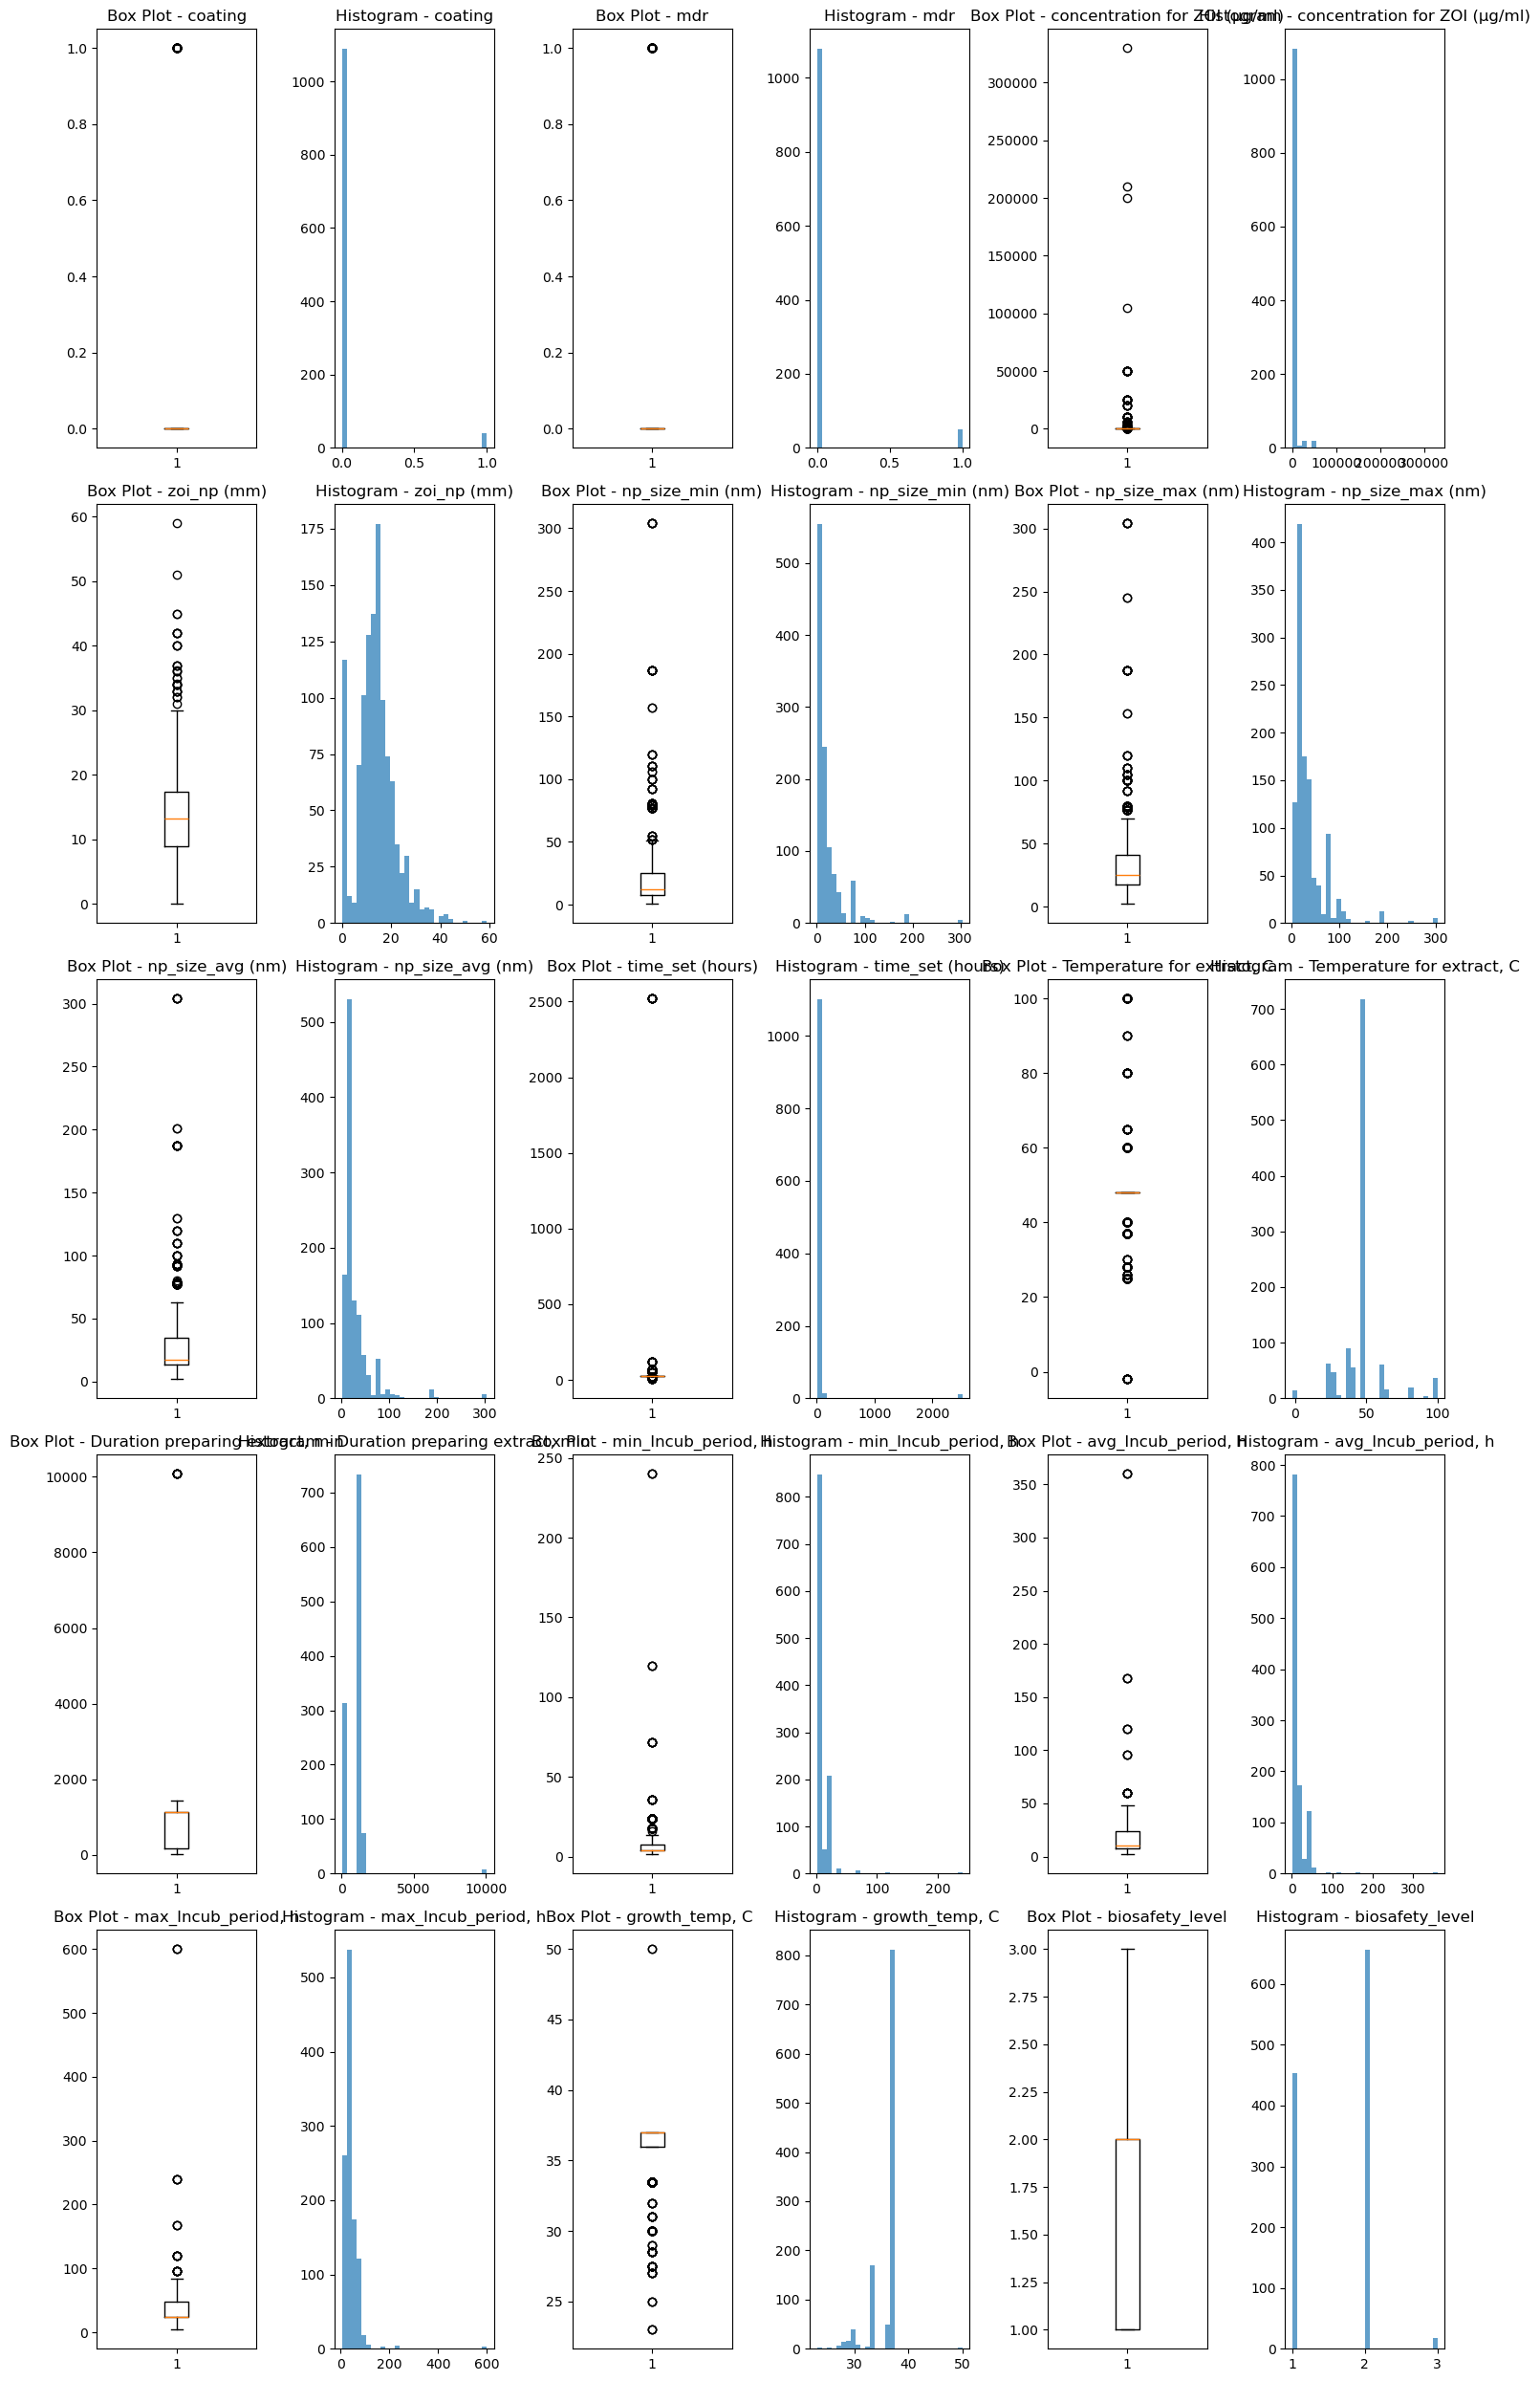


🎯 Categorical Distribution Analysis
=== Categorical Distribution Report ===

Column: np
  Unique values: 15
  Missing values: 0 (0.00%)
  Top values:
    Ag: 658 (58.33%)
    CuO: 182 (16.13%)
    ZnO: 113 (10.02%)
    TiO2: 49 (4.34%)
    Fe2O3: 31 (2.75%)
    Fe3O4: 29 (2.57%)
    Cu: 28 (2.48%)
    Co: 9 (0.80%)
    Cu2O: 8 (0.71%)
    Mo: 7 (0.62%)
--------------------------------------------------
Column: bacteria
  Unique values: 65
  Missing values: 0 (0.00%)
  Top values:
    Escherichia coli: 235 (20.83%)
    Staphylococcus aureus: 197 (17.46%)
    Pseudomonas aeruginosa: 97 (8.60%)
    Bacillus subtilis: 70 (6.21%)
    Klebsiella pneumoniae: 54 (4.79%)
    Candida albicans: 41 (3.63%)
    Micrococcus luteus: 37 (3.28%)
    Salmonella enterica: 29 (2.57%)
    Proteus mirabilis: 25 (2.22%)
    Acinetobacter baumannii: 22 (1.95%)
--------------------------------------------------
Column: strain
  Unique values: 78
  Missing values: 728 (64.54%)
  Top values:
    KY797673: 30 (7

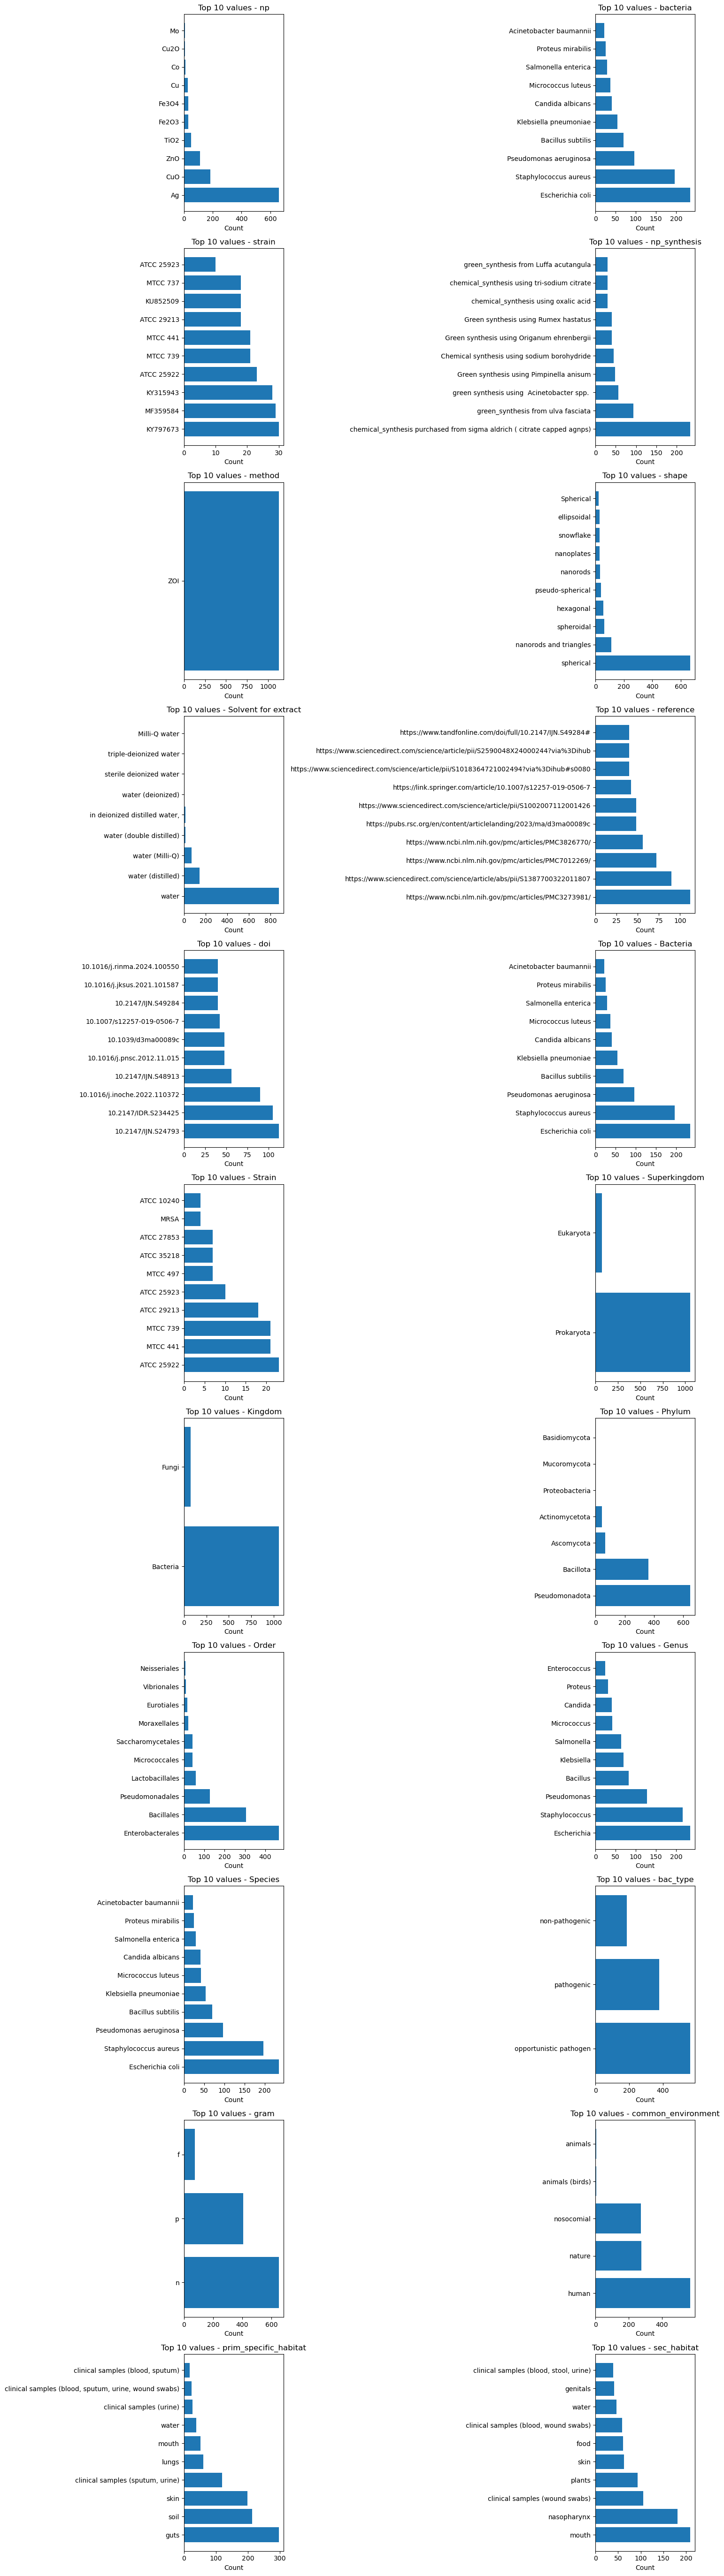


🥧 Pie Charts for Suitable Columns


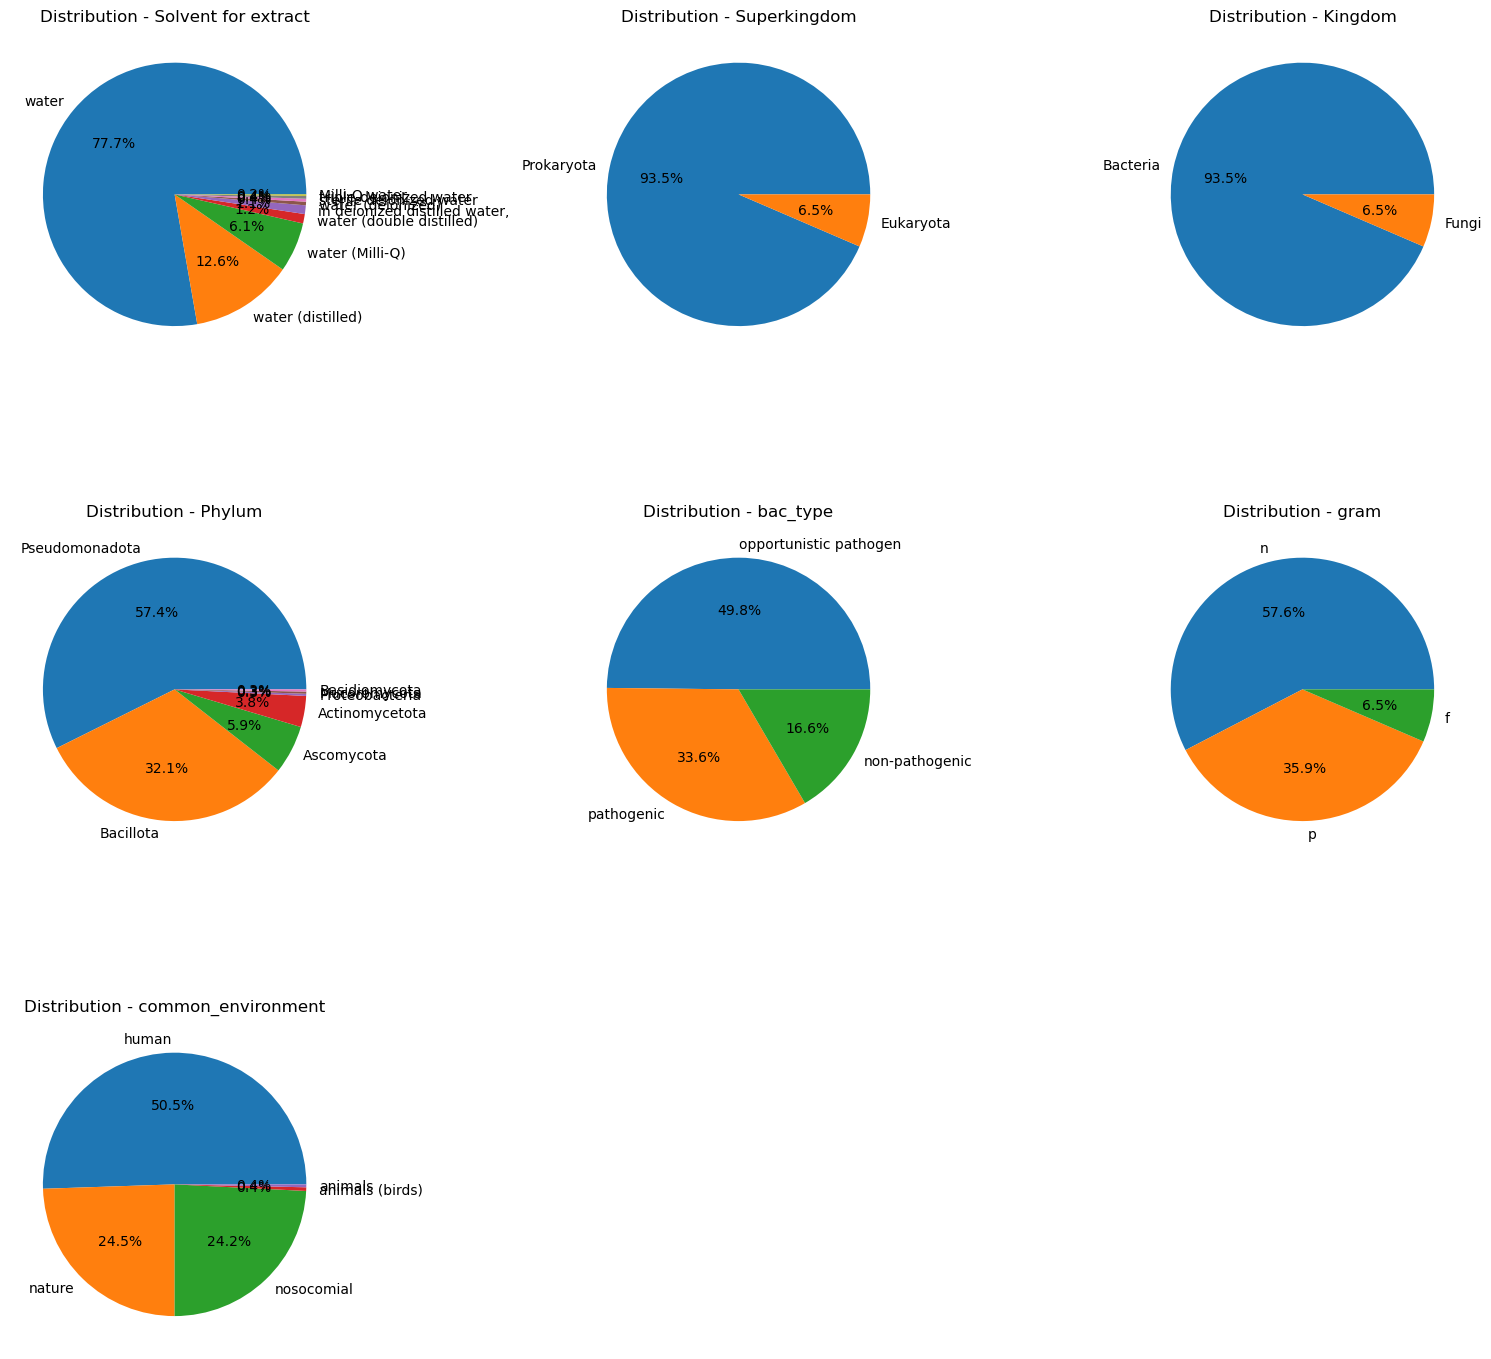


✅ Analysis complete!


In [25]:
analyze_dataframe(ZOI_df, numerical_threshold=3)

🔍 Starting Data Analysis

Numerical columns: ['Unnamed: 0', 'coating', 'mdr', 'MIC_NP (µg/mL)', 'np_size_min (nm)', 'np_size_max (nm)', 'np_size_avg (nm)', 'time_set (hours)', 'Temperature for extract, C', 'Duration preparing extract, min', 'min_Incub_period, h', 'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C ', 'biosafety_level']
Categorical columns: ['np', 'bacteria', 'strain', 'np_synthesis', 'method', 'shape', 'Solvent for extract', 'reference', 'doi', 'Bacteria', 'Strain', 'Superkingdom', 'Kingdom', 'Phylum', 'Order', 'Genus', 'Species', 'bac_type', 'gram', 'common_environment', 'prim_specific_habitat', 'sec_habitat']

📊 Outlier Analysis (IQR Method)
=== Outlier Detection Report (IQR Method) ===

Column: Unnamed: 0
  Outlier count: 0
  Outlier percentage: 0.00%
  Lower bound: -1763.50
  Upper bound: 4846.50
  Outlier values: []
--------------------------------------------------
Column: coating
  Outlier count: 433
  Outlier percentage: 20.64%
  Lower bound: 0.00
  U

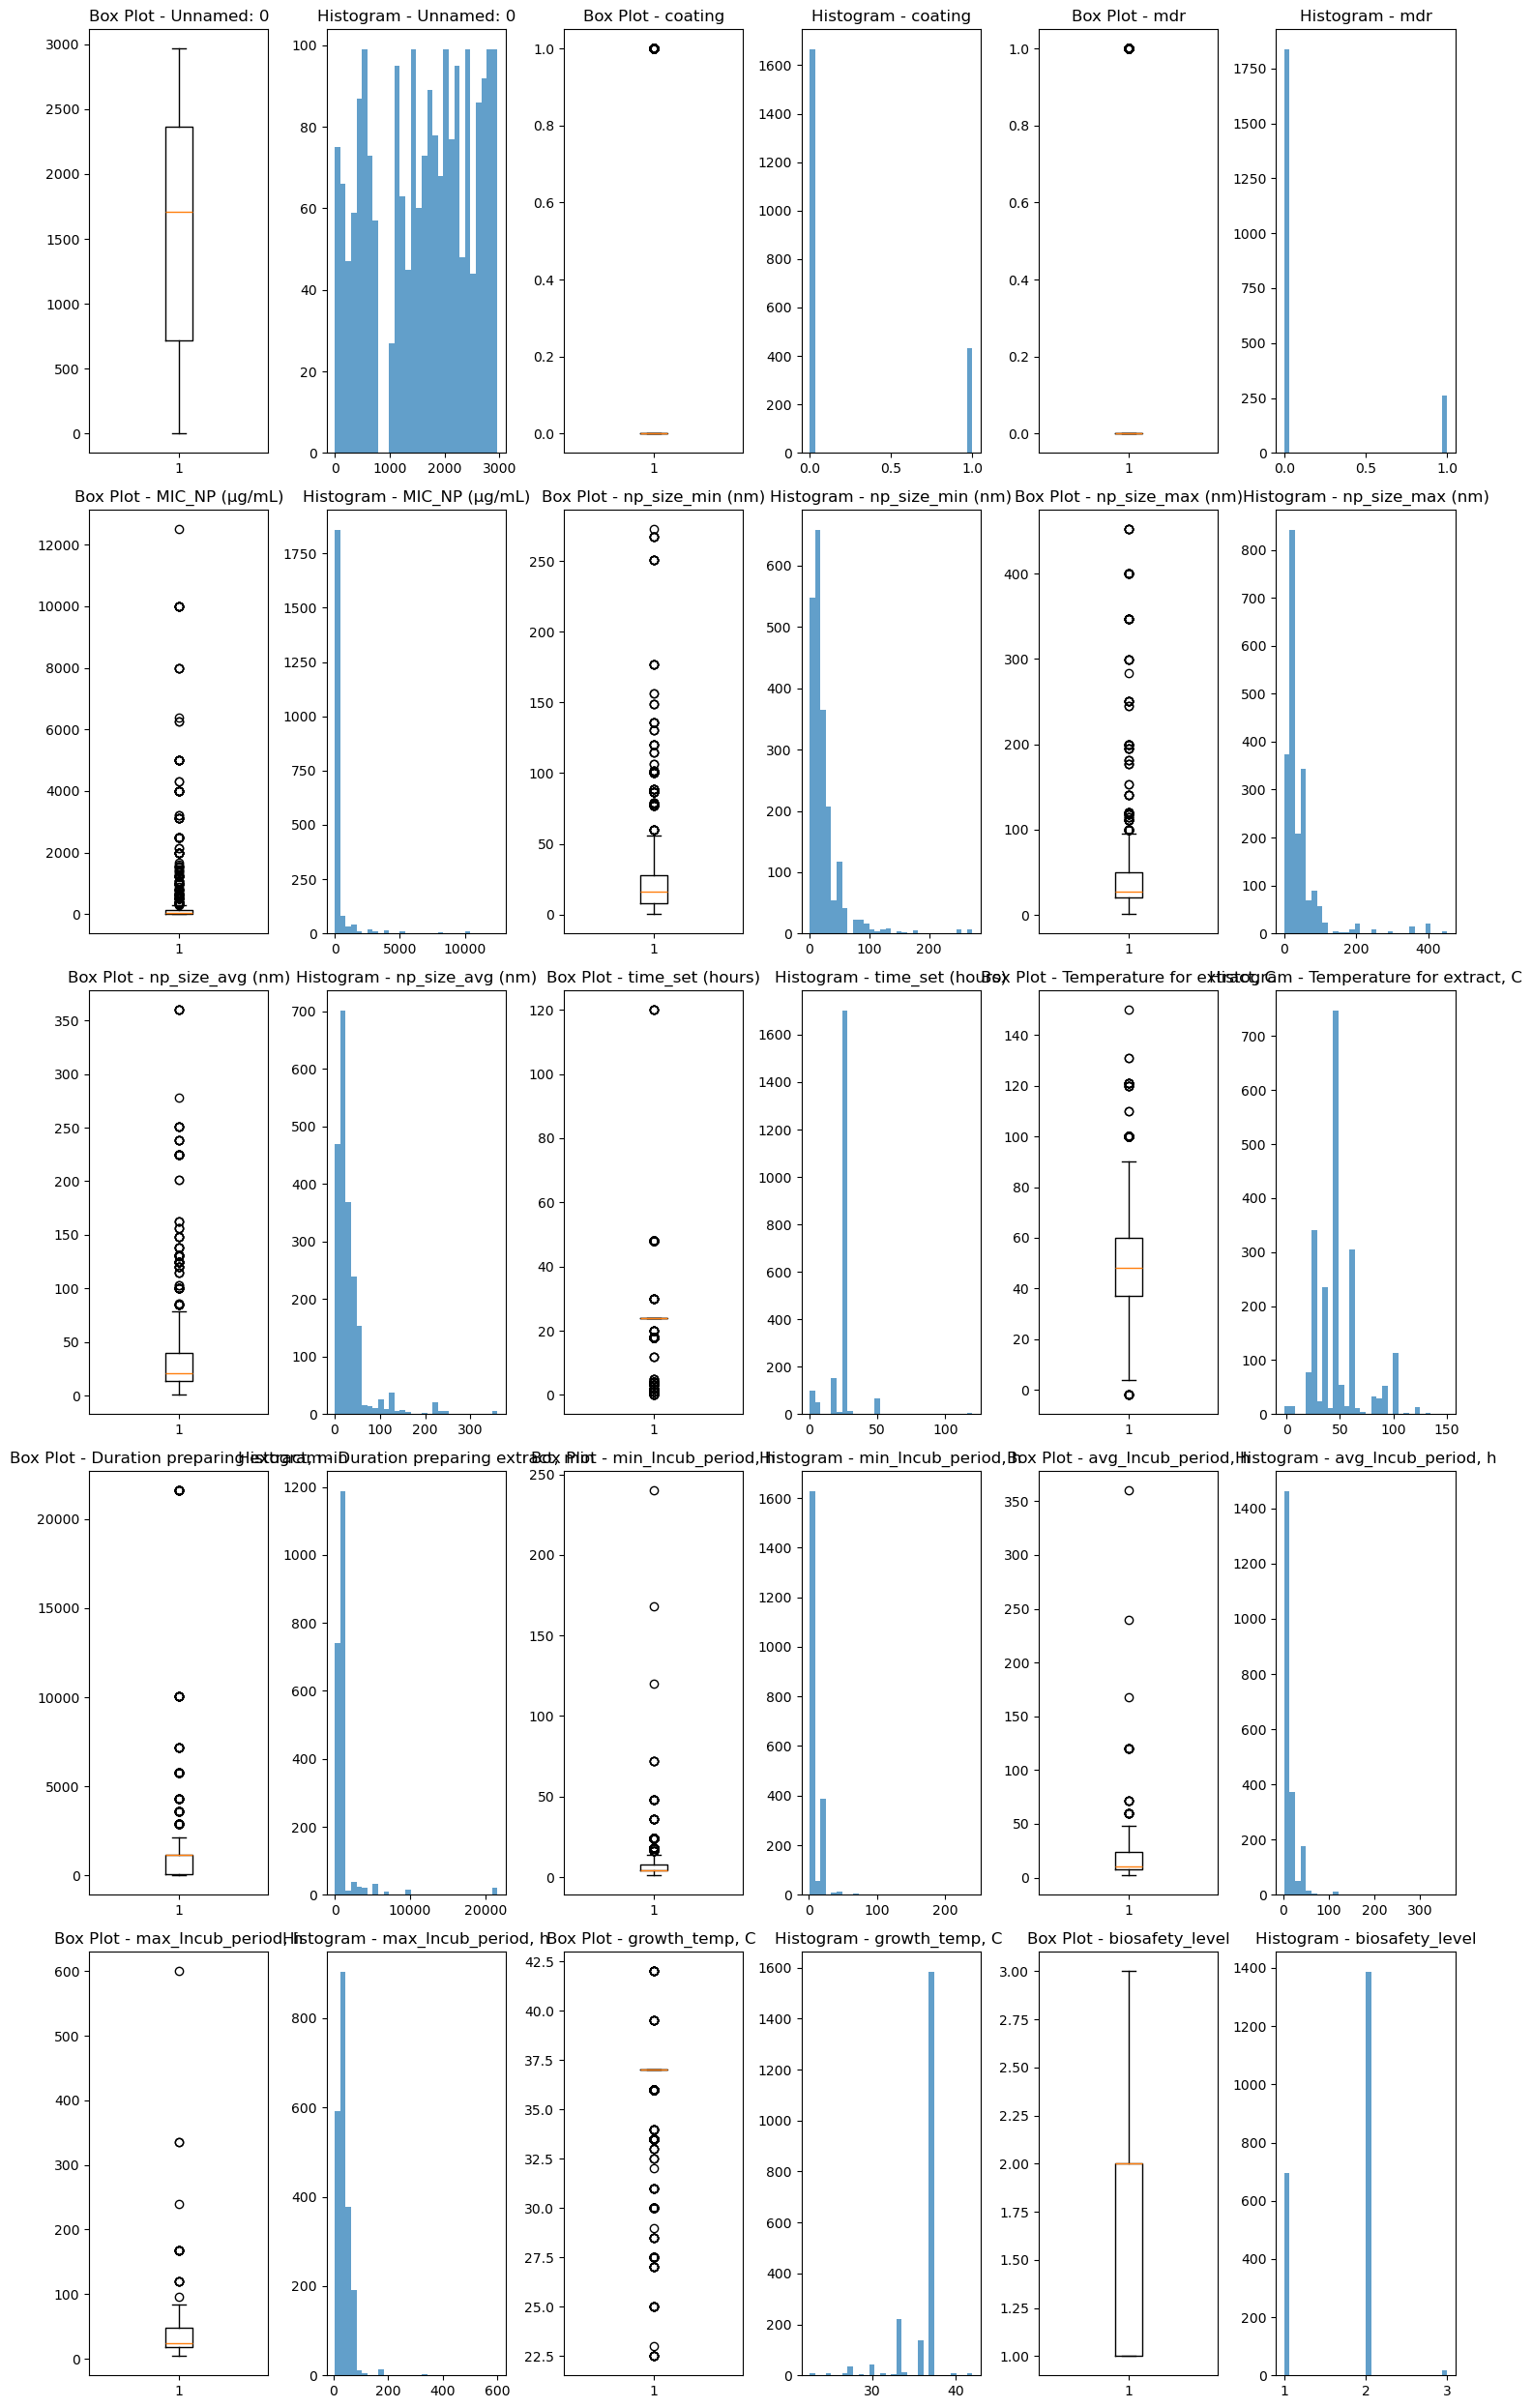


🎯 Categorical Distribution Analysis
=== Categorical Distribution Report ===

Column: np
  Unique values: 15
  Missing values: 0 (0.00%)
  Top values:
    Ag: 1709 (81.46%)
    ZnO: 212 (10.10%)
    Au: 51 (2.43%)
    CuO: 34 (1.62%)
    Cu: 16 (0.76%)
    Al2O3: 16 (0.76%)
    TiO2: 14 (0.67%)
    CeO2: 10 (0.48%)
    Pd: 10 (0.48%)
    Bi2O3: 6 (0.29%)
--------------------------------------------------
Column: bacteria
  Unique values: 102
  Missing values: 0 (0.00%)
  Top values:
    Escherichia coli: 465 (22.16%)
    Staphylococcus aureus: 445 (21.21%)
    Pseudomonas aeruginosa: 232 (11.06%)
    Klebsiella pneumoniae: 142 (6.77%)
    Bacillus subtilis: 88 (4.19%)
    Enterococcus faecalis: 57 (2.72%)
    Staphylococcus epidermidis: 52 (2.48%)
    Acinetobacter baumannii: 51 (2.43%)
    Candida albicans: 51 (2.43%)
    Salmonella enterica: 45 (2.14%)
--------------------------------------------------
Column: strain
  Unique values: 276
  Missing values: 767 (36.56%)
  Top values:
 


🥧 Pie Charts for Suitable Columns


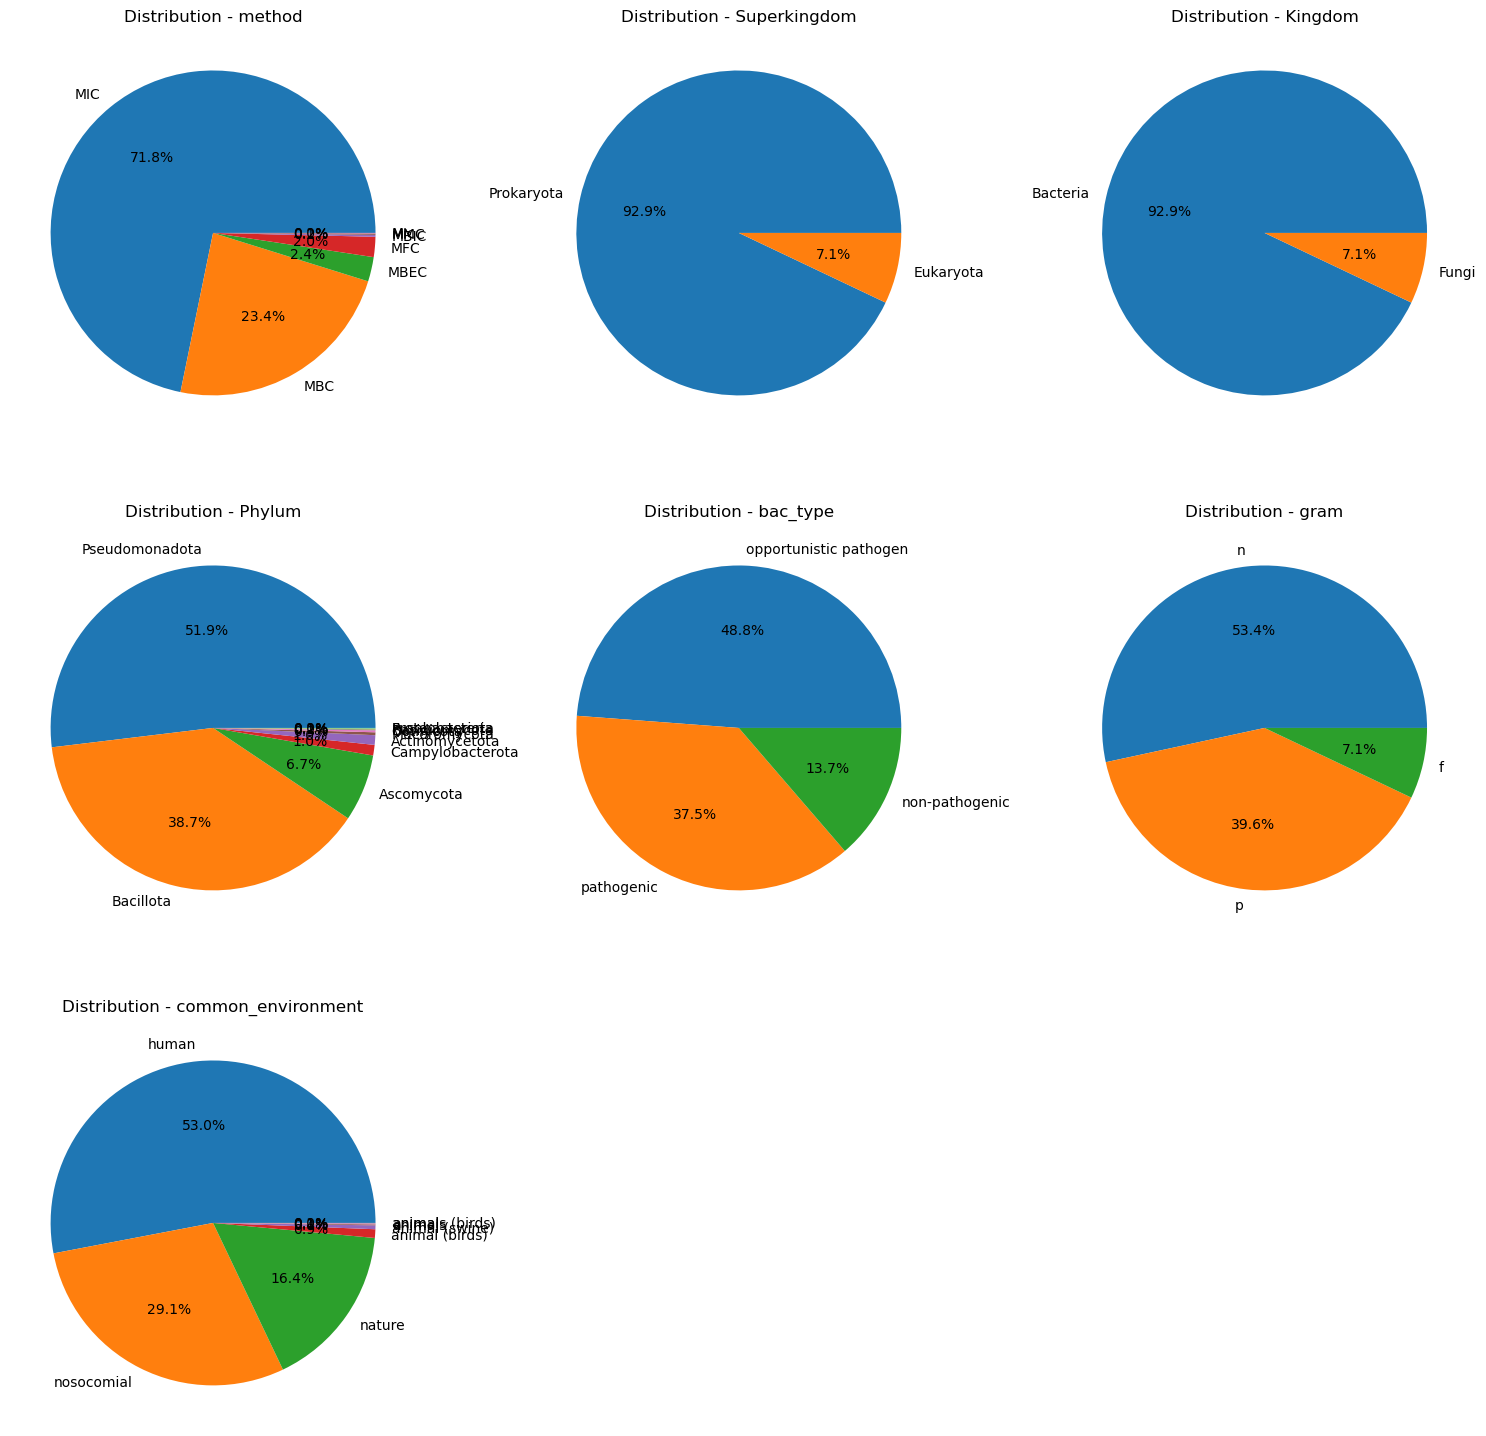


✅ Analysis complete!


In [14]:
analyze_dataframe(MIC_df, numerical_threshold=3)

🔍 Starting Data Analysis

Numerical columns: ['Unnamed: 0', 'coating', 'mdr', 'MIC_NP (µg/mL)', 'np_size_min (nm)', 'np_size_max (nm)', 'np_size_avg (nm)', 'time_set (hours)', 'Temperature for extract, C', 'Duration preparing extract, min', 'min_Incub_period, h', 'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C ', 'biosafety_level']
Categorical columns: ['np', 'bacteria', 'strain', 'np_synthesis', 'method', 'shape', 'Solvent for extract', 'reference', 'doi', 'Bacteria', 'Strain', 'Superkingdom', 'Kingdom', 'Phylum', 'Order', 'Genus', 'Species', 'bac_type', 'gram', 'common_environment', 'prim_specific_habitat', 'sec_habitat']

📊 Outlier Analysis (IQR Method)
=== Outlier Detection Report (IQR Method) ===

Column: Unnamed: 0
  Outlier count: 0
  Outlier percentage: 0.00%
  Lower bound: -1763.50
  Upper bound: 4846.50
  Outlier values: []
--------------------------------------------------
Column: coating
  Outlier count: 433
  Outlier percentage: 20.64%
  Lower bound: 0.00
  U

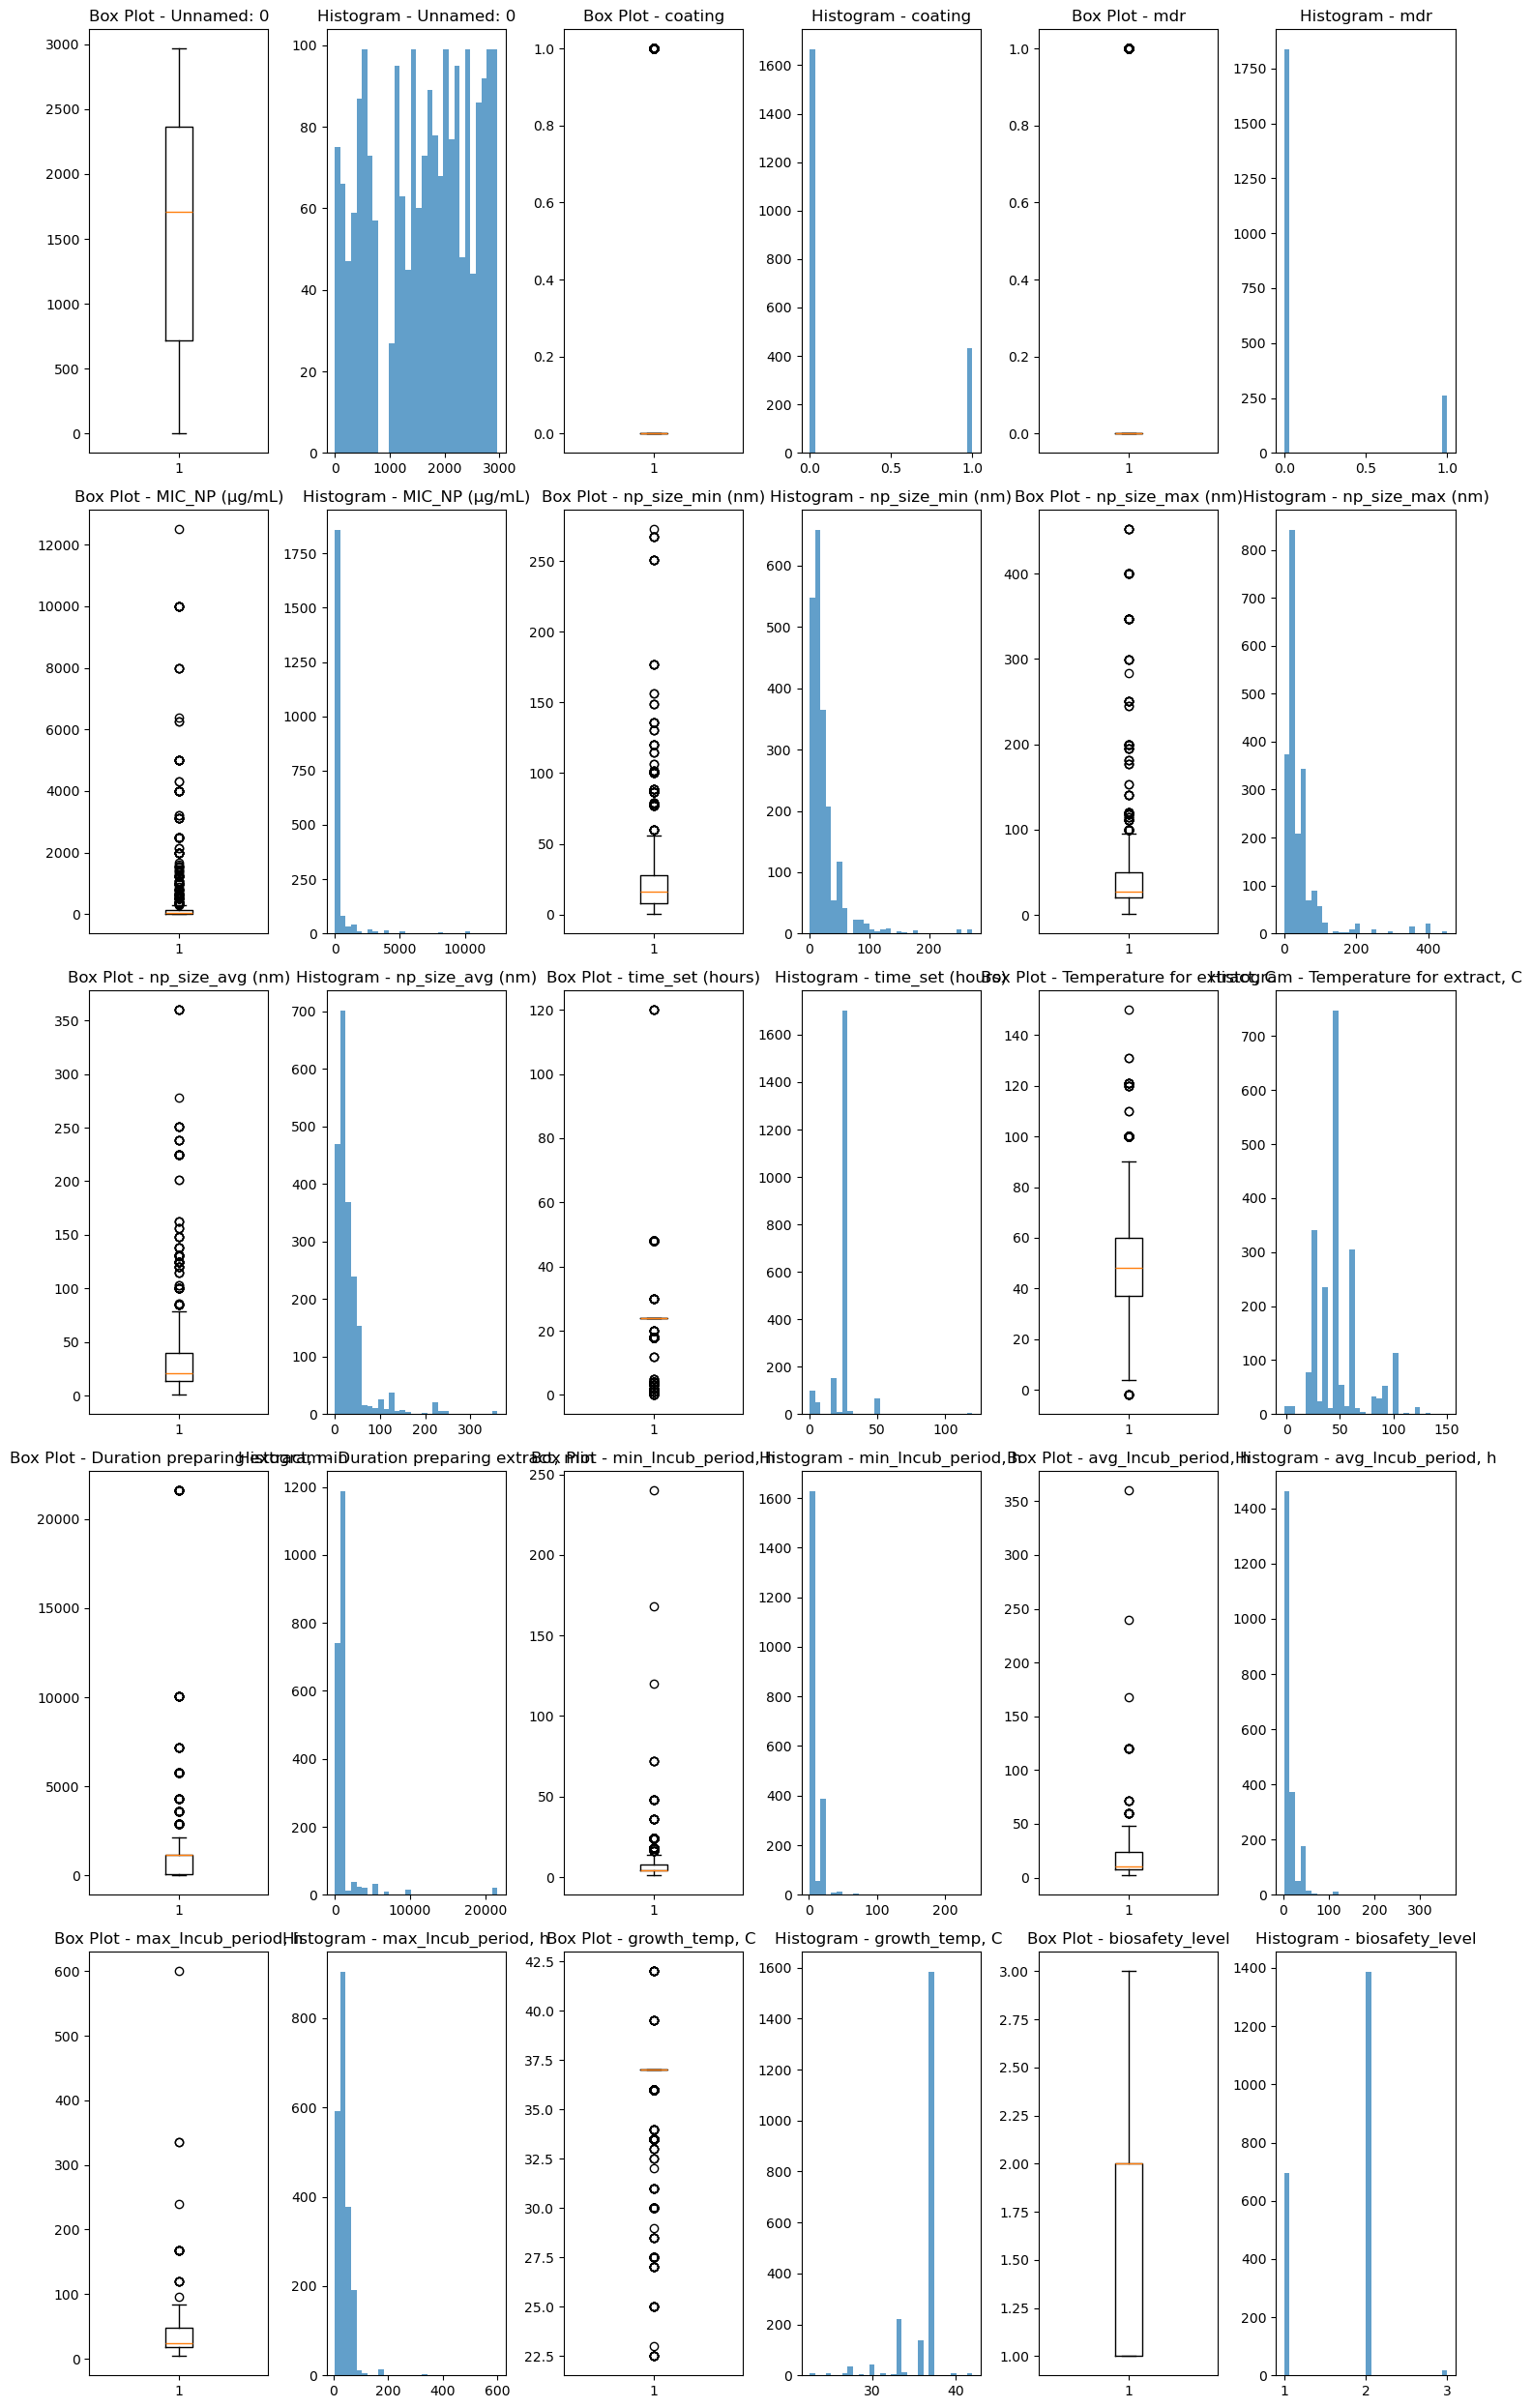


🎯 Categorical Distribution Analysis


NameError: name 'analyze_categorical_distribution' is not defined

In [12]:
analyze_dataframe(MIC_df, numerical_threshold=3)

In [16]:
def analyze_categorical_distribution(df, categorical_columns=None, top_n=10):
    """
    Analyze distribution of categorical columns
    """
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    distribution_report = {}
    
    for col in categorical_columns:
        if col in df.columns:
            value_counts = df[col].value_counts()
            value_percentage = df[col].value_counts(normalize=True) * 100
            
            distribution_report[col] = {
                'unique_values': len(value_counts),
                'missing_values': df[col].isnull().sum(),
                'missing_percentage': (df[col].isnull().sum() / len(df)) * 100,
                'top_values': value_counts.head(top_n).to_dict(),
                'value_percentage': value_percentage.head(top_n).to_dict()
            }
    
    return distribution_report

def visualize_categorical_distribution(df, categorical_columns=None, top_n=10):
    """
    Create visualizations for categorical distribution
    """
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    n_cols = min(2, len(categorical_columns))
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    if len(categorical_columns) == 1:
        axes = np.array([axes])
    
    axes = axes.ravel()
    
    for i, col in enumerate(categorical_columns):
        if i < len(axes):
            top_values = df[col].value_counts().head(top_n)
            axes[i].barh(range(len(top_values)), top_values.values)
            axes[i].set_yticks(range(len(top_values)))
            axes[i].set_yticklabels(top_values.index)
            axes[i].set_title(f'Top {top_n} values - {col}')
            axes[i].set_xlabel('Count')
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def print_categorical_report(distribution_report):
    """
    Print a formatted categorical distribution report
    """
    print("=== Categorical Distribution Report ===\n")
    
    for col, stats in distribution_report.items():
        print(f"Column: {col}")
        print(f"  Unique values: {stats['unique_values']}")
        print(f"  Missing values: {stats['missing_values']} ({stats['missing_percentage']:.2f}%)")
        print("  Top values:")
        for value, count in stats['top_values'].items():
            percentage = stats['value_percentage'].get(value, 0)
            print(f"    {value}: {count} ({percentage:.2f}%)")
        print("-" * 50)

def create_pie_charts(df, categorical_columns=None, top_n=5):
    """
    Create pie charts for categorical columns (for columns with reasonable number of categories)
    """
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Filter columns with reasonable number of categories for pie charts
    suitable_columns = [col for col in categorical_columns 
                       if df[col].nunique() <= 10 and df[col].nunique() > 1]
    
    if not suitable_columns:
        print("No suitable columns for pie charts (should have 2-10 unique values)")
        return
    
    n_cols = min(3, len(suitable_columns))
    n_rows = (len(suitable_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    if len(suitable_columns) == 1:
        axes = np.array([axes])
    
    axes = axes.ravel()
    
    for i, col in enumerate(suitable_columns):
        if i < len(axes):
            value_counts = df[col].value_counts()
            axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            axes[i].set_title(f'Distribution - {col}')
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

🔍 Starting Data Analysis

Numerical columns: ['Unnamed: 0', 'coating', 'mdr', 'concentration for ZOI (µg/ml)', 'zoi_np (mm)', 'np_size_min (nm)', 'np_size_max (nm)', 'np_size_avg (nm)', 'time_set (hours)', 'Temperature for extract, C', 'Duration preparing extract, min', 'min_Incub_period, h', 'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C ', 'biosafety_level']
Categorical columns: ['np', 'bacteria', 'strain', 'np_synthesis', 'method', 'shape', 'Solvent for extract', 'reference', 'doi', 'Bacteria', 'Strain', 'Superkingdom', 'Kingdom', 'Phylum', 'Order', 'Genus', 'Species', 'bac_type', 'gram', 'common_environment', 'prim_specific_habitat', 'sec_habitat']

📊 Outlier Analysis (IQR Method)
=== Outlier Detection Report (IQR Method) ===

Column: Unnamed: 0
  Outlier count: 0
  Outlier percentage: 0.00%
  Lower bound: -2278.00
  Upper bound: 6140.00
  Outlier values: []
--------------------------------------------------
Column: coating
  Outlier count: 39
  Outlier percentage: 3


🎯 Categorical Distribution Analysis
=== Categorical Distribution Report ===

Column: np
  Unique values: 15
  Missing values: 0 (0.00%)
  Top values:
    Ag: 658 (58.33%)
    CuO: 182 (16.13%)
    ZnO: 113 (10.02%)
    TiO2: 49 (4.34%)
    Fe2O3: 31 (2.75%)
    Fe3O4: 29 (2.57%)
    Cu: 28 (2.48%)
    Co: 9 (0.80%)
    Cu2O: 8 (0.71%)
    Mo: 7 (0.62%)
--------------------------------------------------
Column: bacteria
  Unique values: 65
  Missing values: 0 (0.00%)
  Top values:
    Escherichia coli: 235 (20.83%)
    Staphylococcus aureus: 197 (17.46%)
    Pseudomonas aeruginosa: 97 (8.60%)
    Bacillus subtilis: 70 (6.21%)
    Klebsiella pneumoniae: 54 (4.79%)
    Candida albicans: 41 (3.63%)
    Micrococcus luteus: 37 (3.28%)
    Salmonella enterica: 29 (2.57%)
    Proteus mirabilis: 25 (2.22%)
    Acinetobacter baumannii: 22 (1.95%)
--------------------------------------------------
Column: strain
  Unique values: 78
  Missing values: 728 (64.54%)
  Top values:
    KY797673: 30 (7

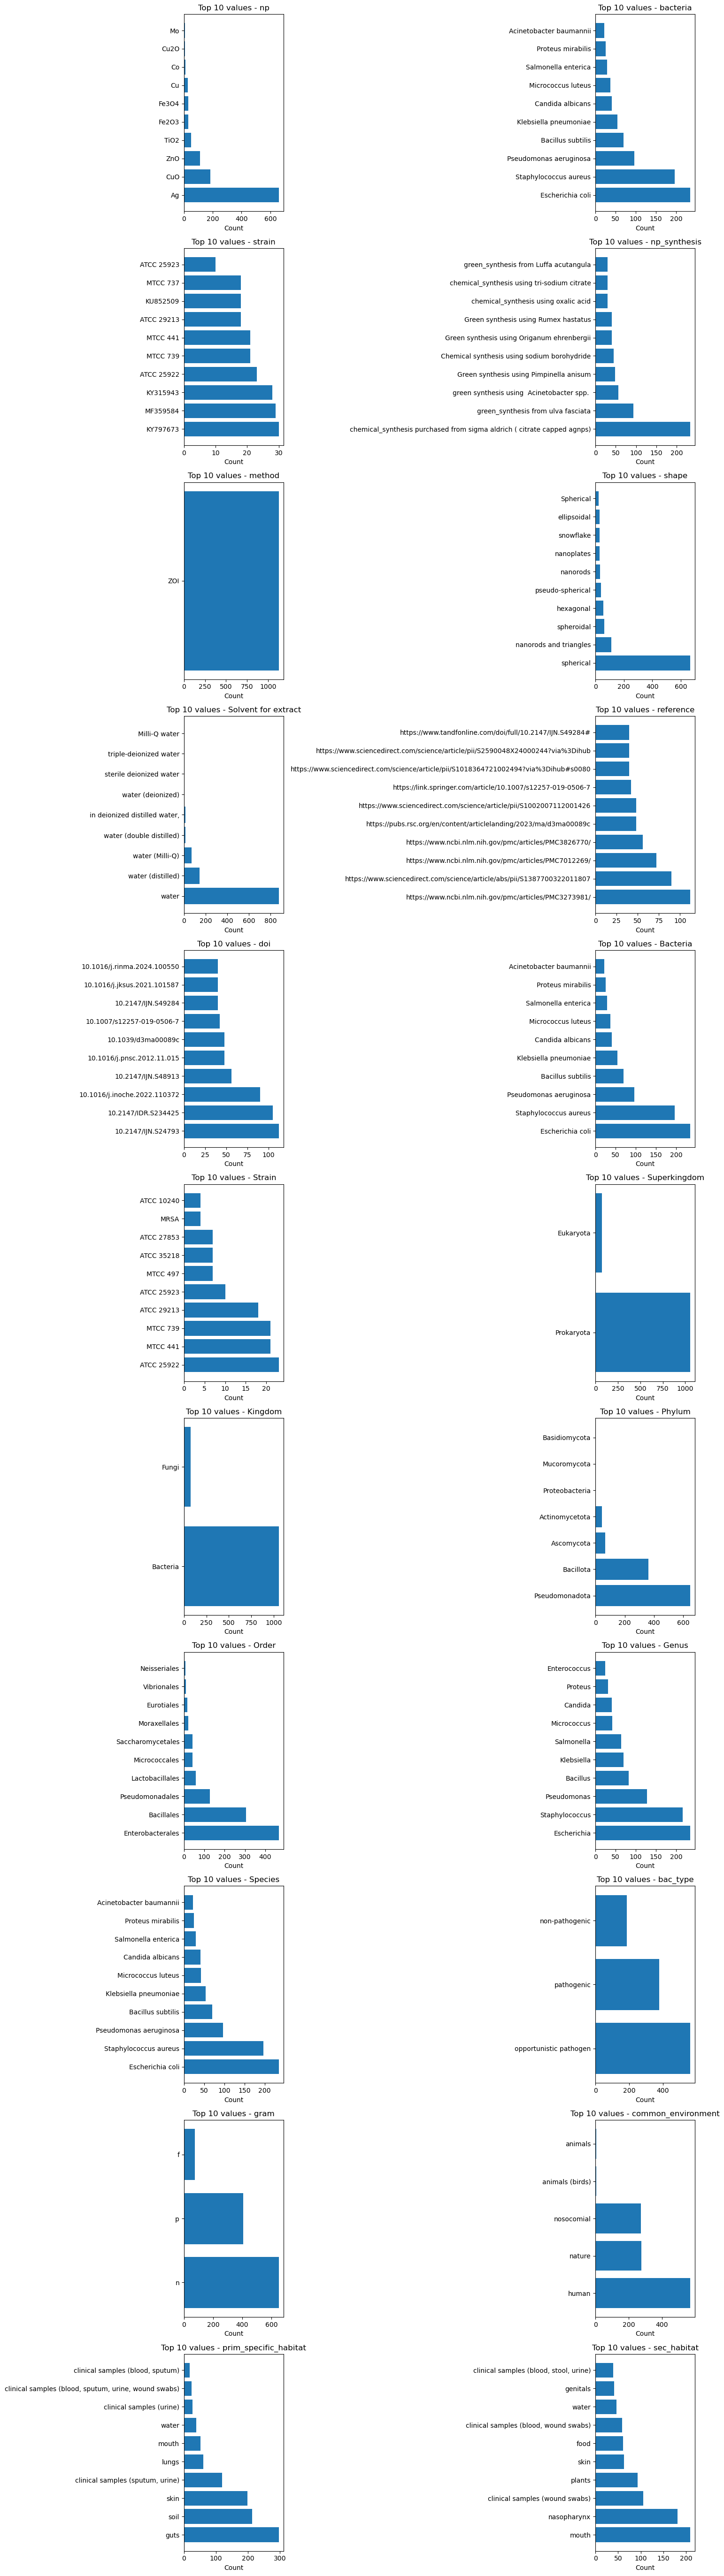


🥧 Pie Charts for Suitable Columns


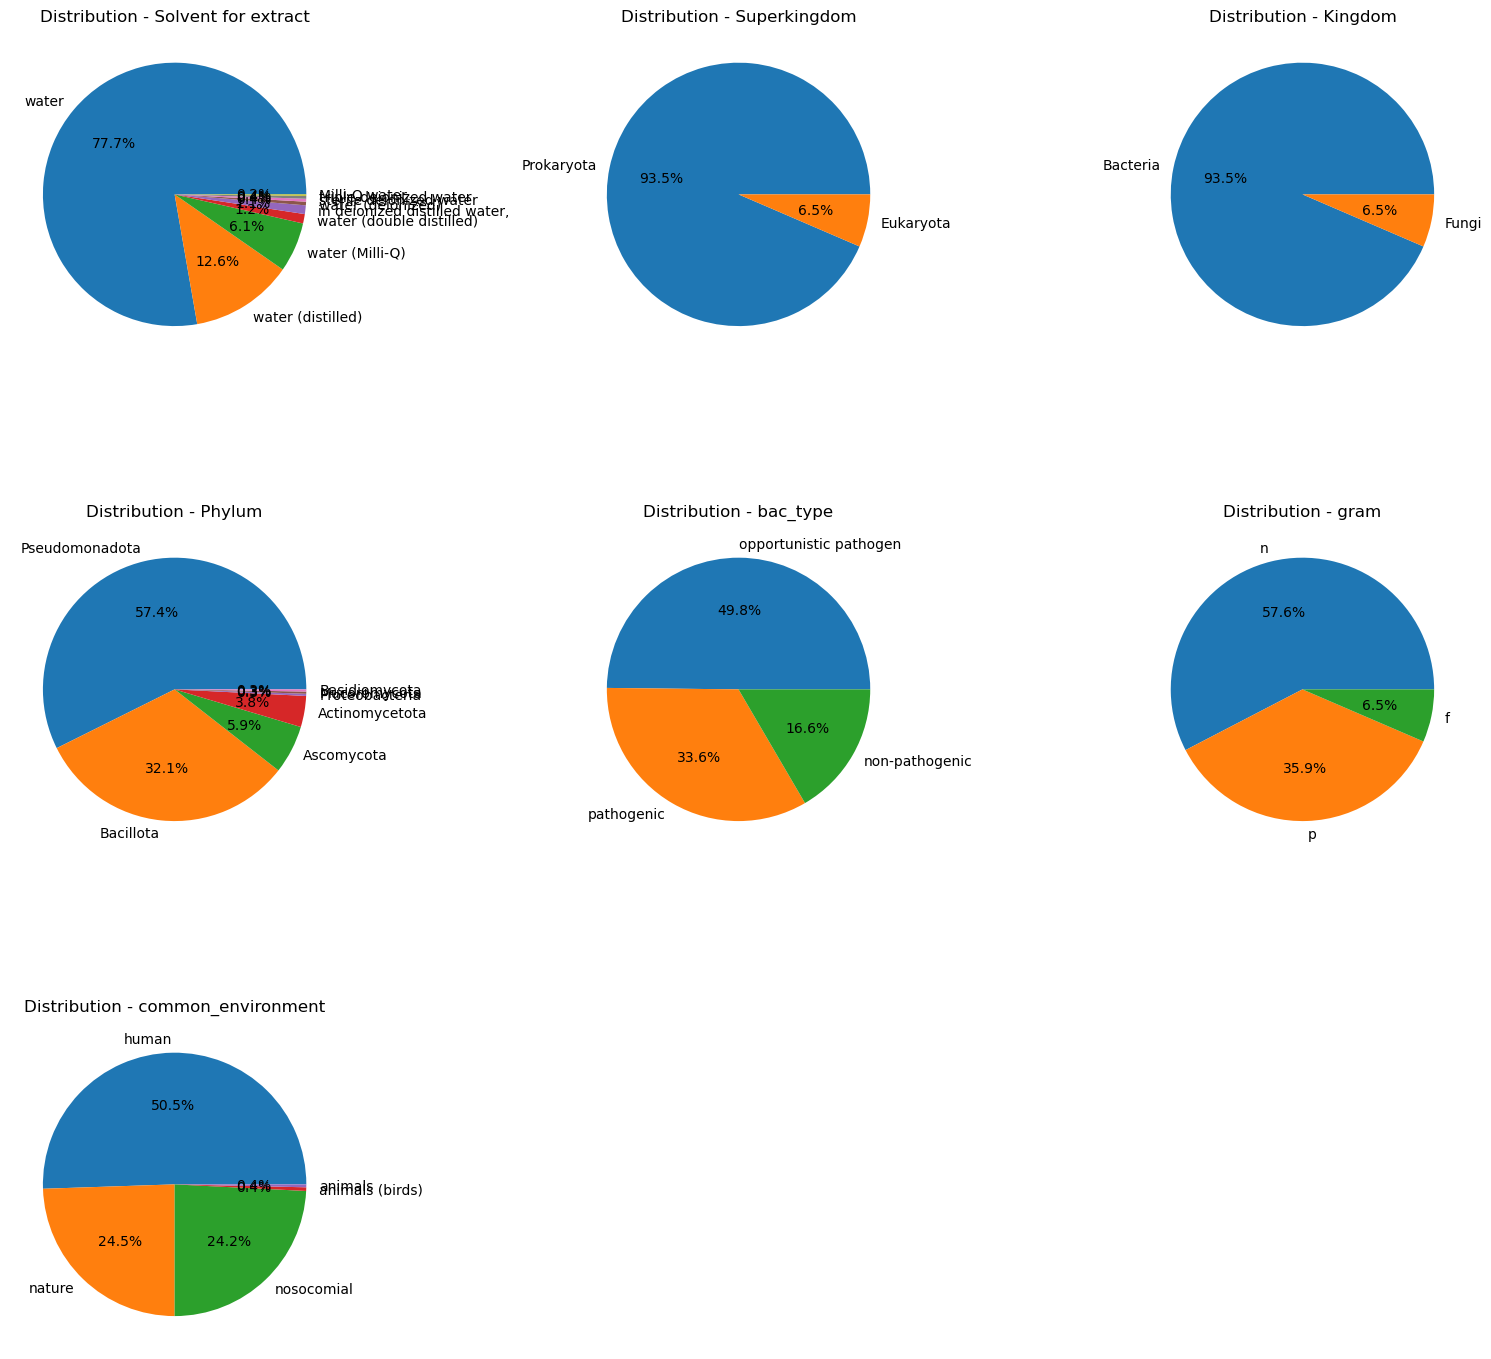


✅ Analysis complete!


In [15]:
# Example usage with your dataframe
def analyze_dataframe(df, numerical_threshold=3):
    """
    Complete analysis of a dataframe
    """
    print("🔍 Starting Data Analysis\n")
    
    # Get column types
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Numerical columns: {numerical_cols}")
    print(f"Categorical columns: {categorical_cols}\n")
    
    # Outlier analysis for numerical columns
    if numerical_cols:
        print("📊 Outlier Analysis (IQR Method)")
        iqr_outliers = detect_outliers_iqr(df, numerical_cols)
        print_outlier_report(iqr_outliers, "IQR")
        
        print("\n📊 Outlier Analysis (Z-score Method)")
        zscore_outliers = detect_outliers_zscore(df, numerical_cols, numerical_threshold)
        print_outlier_report(zscore_outliers, "Z-score")
        
        print("\n📈 Visualizing Outliers")
        visualize_outliers(df, numerical_cols)
    
    # Categorical distribution analysis
    if categorical_cols:
        print("\n🎯 Categorical Distribution Analysis")
        cat_distribution = analyze_categorical_distribution(df, categorical_cols)
        print_categorical_report(cat_distribution)
        
        print("\n📊 Visualizing Categorical Distributions")
        visualize_categorical_distribution(df, categorical_cols)
        
        print("\n🥧 Pie Charts for Suitable Columns")
        create_pie_charts(df, categorical_cols)
    
    print("\n✅ Analysis complete!")

# Usage with your dataframe
analyze_dataframe(ZOI_df, numerical_threshold=3)

# Or for individual analysis:
# outliers_iqr = detect_outliers_iqr(your_dataframe)
# cat_dist = analyze_categorical_distribution(your_dataframe)

In [11]:
def handle_outliers(df, method='iqr', numerical_columns=None):
    """
    Handle outliers by capping them
    """
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    df_clean = df.copy()
    
    for col in numerical_columns:
        if col in df.columns:
            if method == 'iqr':
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                df_clean[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
            
            elif method == 'zscore':
                z_scores = np.abs(stats.zscore(df[col].dropna()))
                mean_val = df[col].mean()
                std_val = df[col].std()
                df_clean[col] = df[col].clip(lower=mean_val-3*std_val, upper=mean_val+3*std_val)
    
    return df_clean

def get_data_summary(df):
    """
    Get comprehensive data summary
    """
    summary = {
        'shape': df.shape,
        'numerical_columns': df.select_dtypes(include=[np.number]).columns.tolist(),
        'categorical_columns': df.select_dtypes(include=['object', 'category']).columns.tolist(),
        'missing_values': df.isnull().sum().to_dict(),
        'data_types': df.dtypes.to_dict()
    }
    return summary

In [9]:
import pandas as pd
MIC_df = pd.read_csv('MIC_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MIC_df.csv'

In [8]:
MIC_df

Unnamed: 0  np  coating           bacteria  mdr     strain  \
0              0  Ag        0  Bacillus subtilis    0   MTCC 441   
1              1  Ag        0  Bacillus subtilis    0   MTCC 441   
2              2  Ag        0   Escherichia coli    0   MTCC 443   
3              3  Ag        0   Escherichia coli    0   MTCC 739   
4              4  Ag        0   Escherichia coli    0  MTCC 1302   
...          ...  ..      ...                ...  ...        ...   
2093        2963  Ag        0   Escherichia coli    0        NaN   
2094        2964  Ag        0   Escherichia coli    0        NaN   
2095        2965  Ag        0   Escherichia coli    0        NaN   
2096        2966  Ag        0   Escherichia coli    0        NaN   
2097        2967  Ag        0   Escherichia coli    0        NaN   

                                           np_synthesis method  \
0     chemical_synthesis using sodium borohydride an...    MIC   
1     chemical_synthesis using sodium borohydride an...    MBC   
2     chemical_synthesis using sodium borohydride an...    MIC   
3     chemical_synthesis using sodium borohydride an...    MIC   
4     chemical_synthesis using sodium borohydride an...    MIC   
...                                                 ...    ...   
2093           Green synthesis using Acacia cyanophylla    MIC   
2094           Green synthesis using Acacia cyanophylla    MIC   
2095           Green synthesis using Acacia cyanophylla    MIC   
2096           Green synthesis using Acacia cyanophylla    MIC   
2097           Green synthesis using Acacia cyanophylla    MIC   

      MIC_NP (µg/mL)  np_size_min (nm)  ...                bac_type  gram  \
0             40.000              2.26  ...          non-pathogenic     p   
1             60.000              2.26  ...          non-pathogenic     p   
2             40.000              2.26  ...              pathogenic     n   
3            180.000              2.26  ...              pathogenic     n   
4            120.000              2.26  ...  opportunistic pathogen     n   
...              ...               ...  ...                     ...   ...   
2093           3.125             86.98  ...  opportunistic pathogen     n   
2094           6.250             86.98  ...  opportunistic pathogen     n   
2095           6.250             86.98  ...  opportunistic pathogen     n   
2096           6.250             86.98  ...  opportunistic pathogen     n   
2097          12.500             86.98  ...  opportunistic pathogen     n   

     min_Incub_period, h  avg_Incub_period, h max_Incub_period, h  \
0                    6.0                   12                  18   
1                    6.0                   12                  18   
2                    6.0                   12                  18   
3                    6.0                   12                  24   
4                    1.5                    4                  24   
...                  ...                  ...                 ...   
2093                 1.5                    4                  24   
2094                 1.5                    4                  24   
2095                 1.5                    4                  24   
2096                 1.5                    4                  24   
2097                 1.5                    4                  24   

      growth_temp, C   biosafety_level common_environment  \
0                33.5                1             nature   
1                33.5                1             nature   
2                37.0                1              human   
3                37.0                1              human   
4                37.0                1              human   
...               ...              ...                ...   
2093             37.0                1              human   
2094             37.0                1              human   
2095             37.0                1              human   
2096             37.0           

In [7]:
handle_outliers(MIC_df)

Unnamed: 0  np  coating           bacteria  mdr     strain  \
0              0  Ag        0  Bacillus subtilis    0   MTCC 441   
1              1  Ag        0  Bacillus subtilis    0   MTCC 441   
2              2  Ag        0   Escherichia coli    0   MTCC 443   
3              3  Ag        0   Escherichia coli    0   MTCC 739   
4              4  Ag        0   Escherichia coli    0  MTCC 1302   
...          ...  ..      ...                ...  ...        ...   
2093        2963  Ag        0   Escherichia coli    0        NaN   
2094        2964  Ag        0   Escherichia coli    0        NaN   
2095        2965  Ag        0   Escherichia coli    0        NaN   
2096        2966  Ag        0   Escherichia coli    0        NaN   
2097        2967  Ag        0   Escherichia coli    0        NaN   

                                           np_synthesis method  \
0     chemical_synthesis using sodium borohydride an...    MIC   
1     chemical_synthesis using sodium borohydride an...    MBC   
2     chemical_synthesis using sodium borohydride an...    MIC   
3     chemical_synthesis using sodium borohydride an...    MIC   
4     chemical_synthesis using sodium borohydride an...    MIC   
...                                                 ...    ...   
2093           Green synthesis using Acacia cyanophylla    MIC   
2094           Green synthesis using Acacia cyanophylla    MIC   
2095           Green synthesis using Acacia cyanophylla    MIC   
2096           Green synthesis using Acacia cyanophylla    MIC   
2097           Green synthesis using Acacia cyanophylla    MIC   

      MIC_NP (µg/mL)  np_size_min (nm)  ...                bac_type  gram  \
0             40.000             2.260  ...          non-pathogenic     p   
1             60.000             2.260  ...          non-pathogenic     p   
2             40.000             2.260  ...              pathogenic     n   
3            180.000             2.260  ...              pathogenic     n   
4            120.000             2.260  ...  opportunistic pathogen     n   
...              ...               ...  ...                     ...   ...   
2093           3.125            57.225  ...  opportunistic pathogen     n   
2094           6.250            57.225  ...  opportunistic pathogen     n   
2095           6.250            57.225  ...  opportunistic pathogen     n   
2096           6.250            57.225  ...  opportunistic pathogen     n   
2097          12.500            57.225  ...  opportunistic pathogen     n   

     min_Incub_period, h  avg_Incub_period, h max_Incub_period, h  \
0                    6.0                   12                  18   
1                    6.0                   12                  18   
2                    6.0                   12                  18   
3                    6.0                   12                  24   
4                    1.5                    4                  24   
...                  ...                  ...                 ...   
2093                 1.5                    4                  24   
2094                 1.5                    4                  24   
2095                 1.5                    4                  24   
2096                 1.5                    4                  24   
2097                 1.5                    4                  24   

      growth_temp, C   biosafety_level common_environment  \
0                37.0                1             nature   
1                37.0                1             nature   
2                37.0                1              human   
3                37.0                1              human   
4                37.0                1              human   
...               ...              ...                ...   
2093             37.0                1              human   
2094             37.0                1              human   
2095             37.0                1              human   
2096             37.0           